# Projeto final do módulo de Estatística II
### Curso de Data Science do Santander Coders em parceria com a Ada Tech
### Professor: Rogério Mainardes

### Alunos: Matheus Lima e Julia Muto

### Sumário

1. Metadados
2. Tratamento dos dados
3. Análise exploratória dos dados
   1. Análise univariada
   2. Análise Bi e Multivariada
4. 

# 1. Metadados:

### Attributes for "Life Expectancy (WHO)" dataset extracted from https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who:

1. Country
2. Year
3. Status: Developed or Developing status (for each country)
4. Life Expectancy (in ages)
5. Adult Mortality: rates of both sexes (probability of dying between 15 and 60 years per 1000 population)(%)
6. infant deaths: Number of Infant Deaths per 1000 population
7. Alcohol: recorded per capita (15+) consumption (in litres of pure alcohol)
8. percentage expenditure: Expenditure on health as a percentage of Gross Domestic Product per capita(%)
9. Hepatitis B: HepB immunization coverage among 1-year-olds (%)
10. Measles (sarampo): number of reported cases per 1000 population 
11. BMI: Average Body Mass Index of entire population
12. under-five deaths: Number of under-five deaths per 1000 population 
13. Polio: Pol3 immunization coverage among 1-year-olds (%)
14. Total expenditure: General government expenditure on health as a percentage of total government expenditure (%)
15. Diphtheria: diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)
16. HIV/AIDS: Deaths per 1000 live births HIV/AIDS (0-4 years)
17. GPD: Gross Domestic Product per capita (in USD)
18. Population
19. thinness 1-19 years: Prevalence of thinness among children and adolescents for Age 10 to 19 (%)
20. thinness 5-9 years: Prevalence of thinness among children for Age 5 to 9(%)
21. income composition of resources: Human Development Index in terms of income composition of resources (index ranging from 0 to 1)
22. Schooling (in years)

# 2. Tratamento dos dados

In [1]:
# importar das bibliotecas
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import sklearn

# carregar dados
ev_df = pd.read_csv("Life Expectancy Data.csv", header= 0)
ev_df.shape

(2938, 22)

In [2]:
#observar as cinco primeiras linhas de dados
ev_df.head()

Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             64     0.01               73.523582         62.0       492  ...   
2             66     0.01               73.219243         64.0       430  ...   
3             69     0.01               78.184215         67.0      2787  ...   
4             71     0.01                7.097109         68.0      3013  ...   

   Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0    6.0               8.16         65.0        0.1  584.259210  33736494.0   
1   58.0               8.18         62.0        0.1  612.696514    327582.0   
2   62.0               8.13         64.0        0.1  631.744976  31731688.0   
3   67.0               8.52         67.0        0.1  669.959000   3696958.0   
4   68.0               7.87         68.0        0.1   63.537231   2978599.0   

    thinness  1-19 years   thinness 5-9 years  \
0                   17.2                 17.3   
1                   17.5                 17.5   
2                   17.7                 17.7   
3                   17.9                 18.0   
4                   18.2                 18.2   

   Income composition of resources  Schooling  
0                            0.479       10.1  
1                            0.476       10.0  
2                            0.470        9.9  
3                            0.463        9.8  
4                            0.454        9.5  

[5 rows x 22 columns]

In [3]:
# extrair o nome das colunas
ev_df.columns.tolist()

['Country',
 'Year',
 'Status',
 'Life expectancy ',
 'Adult Mortality',
 'infant deaths',
 'Alcohol',
 'percentage expenditure',
 'Hepatitis B',
 'Measles ',
 ' BMI ',
 'under-five deaths ',
 'Polio',
 'Total expenditure',
 'Diphtheria ',
 ' HIV/AIDS',
 'GDP',
 'Population',
 ' thinness  1-19 years',
 ' thinness 5-9 years',
 'Income composition of resources',
 'Schooling']

In [4]:
# renomear colunas para esclarecer informações
ev_df.columns = [
    'country',
    'year',
    'development status',
    'life expectancy',
    'adult mortality',
    'infant deaths',
    'alcohol intake',
    'health over gdp',
    'hepb immunization',
    'measles cases',
    'bmi',
    'under-five deaths',
    'polio immunization',
    'gov health expenditure',
    'dtp3 immunization',
    'hiv/aids deaths',
    'gdp',
    'population',
    'thinness 10-19 years', # according to documentation, it should be from 10 to 19 years
    'thinness 5-9 years',
    'hdi',
    'schooling'
]

In [5]:
ev_df.tail()

country  year development status  life expectancy  adult mortality  \
2933  Zimbabwe  2004         Developing             44.3            723.0   
2934  Zimbabwe  2003         Developing             44.5            715.0   
2935  Zimbabwe  2002         Developing             44.8             73.0   
2936  Zimbabwe  2001         Developing             45.3            686.0   
2937  Zimbabwe  2000         Developing             46.0            665.0   

      infant deaths  alcohol intake  health over gdp  hepb immunization  \
2933             27            4.36              0.0               68.0   
2934             26            4.06              0.0                7.0   
2935             25            4.43              0.0               73.0   
2936             25            1.72              0.0               76.0   
2937             24            1.68              0.0               79.0   

      measles cases  ...  polio immunization  gov health expenditure  \
2933             31  ...                67.0                    7.13   
2934            998  ...                 7.0                    6.52   
2935            304  ...                73.0                    6.53   
2936            529  ...                76.0                    6.16   
2937           1483  ...                78.0                    7.10   

      dtp3 immunization  hiv/aids deaths         gdp  population  \
2933               65.0             33.6  454.366654  12777511.0   
2934               68.0             36.7  453.351155  12633897.0   
2935               71.0             39.8   57.348340    125525.0   
2936               75.0             42.1  548.587312  12366165.0   
2937               78.0             43.5  547.358878  12222251.0   

      thinness 10-19 years  thinness 5-9 years    hdi  schooling  
2933                   9.4                 9.4  0.407        9.2  
2934                   9.8                 9.9  0.418        9.5  
2935                   1.2                 1.3  0.427       10.0  
2936                   1.6                 1.7  0.427        9.8  
2937                  11.0                11.2  0.434        9.8  

[5 rows x 22 columns]

In [6]:
# observar os tipos de dados
ev_df.dtypes

country                    object
year                        int64
development status         object
life expectancy           float64
adult mortality           float64
infant deaths               int64
alcohol intake            float64
health over gdp           float64
hepb immunization         float64
measles cases               int64
bmi                       float64
under-five deaths           int64
polio immunization        float64
gov health expenditure    float64
dtp3 immunization         float64
hiv/aids deaths           float64
gdp                       float64
population                float64
thinness 10-19 years      float64
thinness 5-9 years        float64
hdi                       float64
schooling                 float64
dtype: object

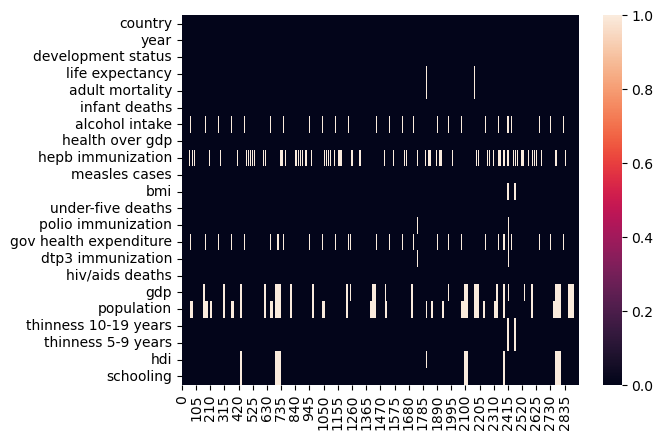

In [7]:
# Observar os dados nulos
_ = sns.heatmap(ev_df.isna().T)

In [8]:
# avaliar a porcentagem de dados que perderíamos se retirássemos os nulos
f"{ ( ev_df.shape[0] - ev_df.dropna().shape[0] ) / ev_df.shape[0] :.1%}"

'43.9%'

In [9]:
# verificar se há algum erro de dados, pois o par (pais, ano) deve
# ser uma chave primária
ev_df[['country', 'year']].duplicated().any()


False

In [10]:
# gdp e population apresentam muitos valores nulos, mas são dados normalmente bem conhecidos e divulgados. 
# Vamos analisar quais paises e em que anos esses dados estao faltando
missing_gdp_groups = ev_df.set_index(['country', 'year'])['gdp'].isna()
missing_gdp_groups = missing_gdp_groups[missing_gdp_groups]
missing_gdp_groups.loc[:] = ''
missing_gdp_groups.to_csv('fill_missing_gdp.csv')

missing_pop_groups = ev_df.set_index(['country', 'year'])['population'].isna()
missing_pop_groups = missing_pop_groups[missing_pop_groups]
missing_pop_groups.loc[:] = ''
missing_pop_groups.to_csv('fill_missing_population.csv')

# preenchendo os arquivos criados, poderiamos resgatar informaçoes nulas

In [11]:
#proporção de dados nulos por variável
ev_df.isna().sum() / ev_df.shape[0] * 100

country                    0.000000
year                       0.000000
development status         0.000000
life expectancy            0.340368
adult mortality            0.340368
infant deaths              0.000000
alcohol intake             6.603131
health over gdp            0.000000
hepb immunization         18.822328
measles cases              0.000000
bmi                        1.157250
under-five deaths          0.000000
polio immunization         0.646698
gov health expenditure     7.692308
dtp3 immunization          0.646698
hiv/aids deaths            0.000000
gdp                       15.248468
population                22.191967
thinness 10-19 years       1.157250
thinness 5-9 years         1.157250
hdi                        5.684139
schooling                  5.547992
dtype: float64

In [12]:
# hdi, schooling, gov health expenditure e alcohol intake: apresentam 
# uma média percentual sobre os dados, então seria interessante inputar
# valores com alguma técnica como a média por grupos de países.

# hdi
dhi_groups = ev_df['hdi'].isna().groupby(ev_df['country'])
missing_dhi_countries = 100 * dhi_groups.sum() / dhi_groups.count()
missing_dhi_countries[missing_dhi_countries > 0]

country
Cook Islands                                            100.0
Czechia                                                 100.0
Côte d'Ivoire                                           100.0
Democratic People's Republic of Korea                   100.0
Democratic Republic of the Congo                        100.0
Marshall Islands                                        100.0
Monaco                                                  100.0
Nauru                                                   100.0
Niue                                                    100.0
Republic of Korea                                       100.0
Republic of Moldova                                     100.0
San Marino                                              100.0
Somalia                                                 100.0
Tuvalu                                                  100.0
United Kingdom of Great Britain and Northern Ireland    100.0
United Republic of Tanzania                             100.0


In [13]:
# schooling
schooling_groups = ev_df['schooling'].isna().groupby(ev_df['country'])
missing_schooling_countries = 100 * schooling_groups.sum() / schooling_groups.count()
missing_schooling_countries[missing_schooling_countries > 0]

country
Cook Islands                                            100.0
Czechia                                                 100.0
Côte d'Ivoire                                           100.0
Democratic People's Republic of Korea                   100.0
Democratic Republic of the Congo                        100.0
Monaco                                                  100.0
Niue                                                    100.0
Republic of Korea                                       100.0
Republic of Moldova                                     100.0
Somalia                                                 100.0
United Kingdom of Great Britain and Northern Ireland    100.0
United Republic of Tanzania                             100.0
United States of America                                100.0
Name: schooling, dtype: float64

In [14]:
# 100% dos dados de HDI e Escolaridade dos paises listados acima estão com
# dados ausentes, aqui é válida uma pesquisa para preencher os dados com valores 
# reais assim como foi feita para população e gdp, ou então, uma remoção das colunas.

# gov health expenditure
ghe_groups = ev_df['gov health expenditure'].isna().groupby(ev_df['country'])
missing_ghe_countries = 100 * ghe_groups.sum() / ghe_groups.count()
display(missing_ghe_countries)

print('\nMas atenção para:')
missing_ghe_countries[missing_ghe_countries == 100]

country
Afghanistan                           0.00
Albania                               0.00
Algeria                               6.25
Angola                                6.25
Antigua and Barbuda                   6.25
                                      ... 
Venezuela (Bolivarian Republic of)    6.25
Viet Nam                              6.25
Yemen                                 6.25
Zambia                                6.25
Zimbabwe                              6.25
Name: gov health expenditure, Length: 193, dtype: float64


Mas atenção para:


country
Democratic People's Republic of Korea    100.0
Somalia                                  100.0
Name: gov health expenditure, dtype: float64

In [15]:
# Seria impossivel estimar uma média do gasto do governo com saúde para esses paises
ghe_groups.count()[["Democratic People's Republic of Korea", "Somalia"]]

country
Democratic People's Republic of Korea    16
Somalia                                  16
Name: gov health expenditure, dtype: int64

In [16]:
# Mas para o resto teriamos:
ev_df['gov health expenditure'].fillna(
  value = ev_df.groupby('country')['gov health expenditure'].transform('mean')
)

0       8.16
1       8.18
2       8.13
3       8.52
4       7.87
        ... 
2933    7.13
2934    6.52
2935    6.53
2936    6.16
2937    7.10
Name: gov health expenditure, Length: 2938, dtype: float64

In [17]:
# alcohol intake
alcohol_groups = ev_df['alcohol intake'].isna().groupby(ev_df['country'])
missing_alcohol_countries = 100 * alcohol_groups.sum() / alcohol_groups.count()
display(missing_alcohol_countries)

print('\nMas atenção para:')
missing_alcohol_countries[missing_alcohol_countries == 100]

country
Afghanistan                           0.00
Albania                               0.00
Algeria                               6.25
Angola                                6.25
Antigua and Barbuda                   6.25
                                      ... 
Venezuela (Bolivarian Republic of)    6.25
Viet Nam                              6.25
Yemen                                 6.25
Zambia                                6.25
Zimbabwe                              6.25
Name: alcohol intake, Length: 193, dtype: float64


Mas atenção para:


country
Palau          100.0
South Sudan    100.0
Name: alcohol intake, dtype: float64

In [18]:
# Seria impossivel estimar uma média do consumo de alcool para esses paises
alcohol_groups.count()[["Palau", "South Sudan"]]

country
Palau           1
South Sudan    16
Name: alcohol intake, dtype: int64

In [19]:
# Mas para o resto teriamos:
ev_df['alcohol intake'].fillna(
  value = ev_df.groupby('country')['alcohol intake'].transform('mean')
)

0       0.01
1       0.01
2       0.01
3       0.01
4       0.01
        ... 
2933    4.36
2934    4.06
2935    4.43
2936    1.72
2937    1.68
Name: alcohol intake, Length: 2938, dtype: float64

In [20]:
# À primeira vista, sugere-se uma limpeza de dados:
def limpar_dados(raw_df,
                 carregar_gdp = True,
                 carregar_pop = True,
                 hdi_flag = True, 
                 schooling_flag = True,
                 gov_health_expenditure_flag = True,
                 alcohol_intake_flag = True,
                 hepb_immunization_flag = True,
                 remover_nan = True
                 ):
  df_tratado = raw_df.copy()

  # gdp
  if carregar_gdp:
    old_index = df_tratado.index
    df_tratado = df_tratado.set_index(['country', 'year'])
    missing_gdp_groups = pd.read_csv('fill_missing_gdp.csv', header= 0, index_col= [0, 1])
    missing_gdp_groups.replace('', np.nan)
    df_tratado = df_tratado.fillna(missing_gdp_groups)
    df_tratado = df_tratado.reset_index()
    df_tratado.index = old_index

  # population
  if carregar_pop:
    old_index = df_tratado.index
    df_tratado = df_tratado.set_index(['country', 'year'])
    missing_pop_groups = pd.read_csv('fill_missing_population.csv', header= 0, index_col= [0, 1])
    missing_pop_groups.replace('', np.nan)
    df_tratado = df_tratado.fillna(missing_pop_groups)
    df_tratado = df_tratado.reset_index()
    df_tratado.index = old_index

  # hdi
  if hdi_flag:
    df_tratado = df_tratado.drop('hdi', axis= 1)

  # schooling
  if schooling_flag:
    df_tratado = df_tratado.drop('schooling', axis= 1)

  # gov health expenditure 
  if gov_health_expenditure_flag: 
    ev_df['gov health expenditure'] = ev_df['gov health expenditure'].fillna(
      value = ev_df.groupby('country')['gov health expenditure'].transform('mean')
    )

  # alcohol intake
  if alcohol_intake_flag: 
    ev_df['gov health expenditure'] = ev_df['gov health expenditure'].fillna(
      value = ev_df.groupby('country')['gov health expenditure'].transform('mean')
    )

  # hepb immunization: apresenta 18.822328% de dados nulos, o melhor a principio 
  # é remover a coluna
  if hepb_immunization_flag: 
    df_tratado = df_tratado.drop('hepb immunization', axis= 1)

  # remover linhas (registros) com dados ainda ausentes
  if remover_nan:
    df_tratado = df_tratado.dropna().reset_index()

  return df_tratado

In [21]:
print('Depois de tratar:', limpar_dados(ev_df).shape[0])
print('Antes de tratar:', ev_df.shape[0])

Depois de tratar: 2094
Antes de tratar: 2938


In [22]:
# observar algumas informações básicas
ev_df.describe()

year  life expectancy  adult mortality  infant deaths  \
count  2938.000000      2928.000000      2928.000000    2938.000000   
mean   2007.518720        69.224932       164.796448      30.303948   
std       4.613841         9.523867       124.292079     117.926501   
min    2000.000000        36.300000         1.000000       0.000000   
25%    2004.000000        63.100000        74.000000       0.000000   
50%    2008.000000        72.100000       144.000000       3.000000   
75%    2012.000000        75.700000       228.000000      22.000000   
max    2015.000000        89.000000       723.000000    1800.000000   

       alcohol intake  health over gdp  hepb immunization  measles cases  \
count     2744.000000      2938.000000        2385.000000    2938.000000   
mean         4.602861       738.251295          80.940461    2419.592240   
std          4.052413      1987.914858          25.070016   11467.272489   
min          0.010000         0.000000           1.000000       0.000000   
25%          0.877500         4.685343          77.000000       0.000000   
50%          3.755000        64.912906          92.000000      17.000000   
75%          7.702500       441.534144          97.000000     360.250000   
max         17.870000     19479.911610          99.000000  212183.000000   

               bmi  under-five deaths  polio immunization  \
count  2904.000000        2938.000000         2919.000000   
mean     38.321247          42.035739           82.550188   
std      20.044034         160.445548           23.428046   
min       1.000000           0.000000            3.000000   
25%      19.300000           0.000000           78.000000   
50%      43.500000           4.000000           93.000000   
75%      56.200000          28.000000           97.000000   
max      87.300000        2500.000000           99.000000   

       gov health expenditure  dtp3 immunization  hiv/aids deaths  \
count             2906.000000        2919.000000      2938.000000   
mean                 5.920966          82.324084         1.742103   
std                  2.469245          23.716912         5.077785   
min                  0.370000           2.000000         0.100000   
25%                  4.260000          78.000000         0.100000   
50%                  5.745333          93.000000         0.100000   
75%                  7.440000          97.000000         0.800000   
max                 17.600000          99.000000        50.600000   

                 gdp    population  thinness 10-19 years  thinness 5-9 years  \
count    2490.000000  2.286000e+03           2904.000000         2904.000000   
mean     7483.158469  1.275338e+07              4.839704            4.870317   
std     14270.169342  6.101210e+07              4.420195            4.508882   
min         1.681350  3.400000e+01              0.100000            0.100000   
25%       463.935626  1.957932e+05              1.600000            1.500000   
50%      1766.947595  1.386542e+06              3.300000            3.300000   
75%      5910.806335  7.420359e+06              7.200000            7.200000   
max    119172.741800  1.293859e+09             27.700000           28.600000   

               hdi    schooling  
count  2771.000000  2775.000000  
mean      0.627551    11.992793  
std       0.210904     3.358920  
min       0.000000     0.000000  
25%       0.493000    10.100000  
50%       0.677000    12.300000  
75%       0.779000    14.300000  
max       0.948000    20.700000

# 3. Análise exploratória dos dados

## 3.1 Análise univariada

In [23]:
# country
distinct_countries = ev_df.country.value_counts()
print('Número de paises:', distinct_countries.count())
print('Máximo de registros de um pais:', distinct_countries.max())
print('Mínimo de registros de um pais:', distinct_countries.min())

#cada registro corresponde a um ano

Número de paises: 193
Máximo de registros de um pais: 16
Mínimo de registros de um pais: 1


In [24]:
# Vários paises têm apenas um registro, enquanto os demais têm 16. Eles estão sendo chamados de rare_countries
rare_countries = distinct_countries[distinct_countries < 16]
display(rare_countries)

Tuvalu                   1
Cook Islands             1
Marshall Islands         1
Monaco                   1
Palau                    1
Niue                     1
San Marino               1
Nauru                    1
Saint Kitts and Nevis    1
Dominica                 1
Name: country, dtype: int64

In [25]:
# todos de 2013, quase no final do intervalo temporal dos dados colhidos 
ev_df.year.min(), ev_df.year.max()

(2000, 2015)

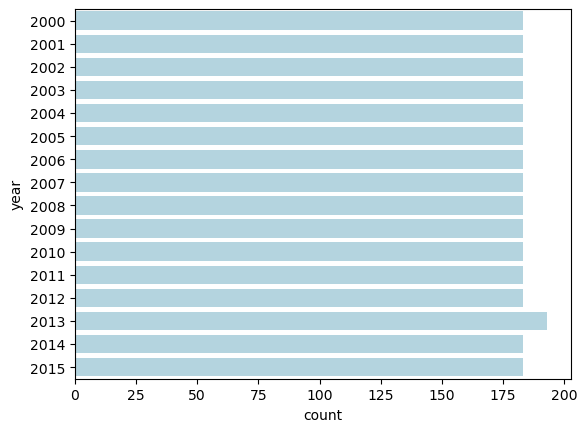

In [26]:
# year: distribuicao do periodo 
_= sns.countplot(ev_df, y= 'year', color= 'lightblue')

In [27]:
# observa-se a pequena discrepância onde existem os paises que têm apenas 
# um registro colhido: eles podem influenciar o modelo negativamente, entao 
# devemos levar em conta manter esses dados ou não

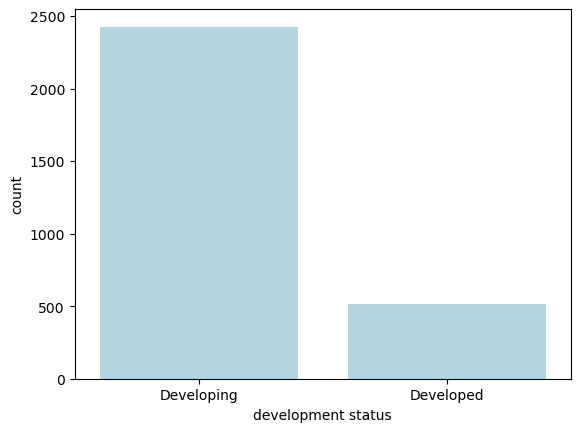

In [28]:
# development status
_= sns.countplot(ev_df, x= 'development status', color= 'lightblue')

In [29]:
# aqui, transformaremos esse dado categórico para aplicação em modelos de regressão:
# método dummy
pd.get_dummies(ev_df, columns= ['development status'], drop_first= True)

country  year  life expectancy  adult mortality  infant deaths  \
0     Afghanistan  2015             65.0            263.0             62   
1     Afghanistan  2014             59.9            271.0             64   
2     Afghanistan  2013             59.9            268.0             66   
3     Afghanistan  2012             59.5            272.0             69   
4     Afghanistan  2011             59.2            275.0             71   
...           ...   ...              ...              ...            ...   
2933     Zimbabwe  2004             44.3            723.0             27   
2934     Zimbabwe  2003             44.5            715.0             26   
2935     Zimbabwe  2002             44.8             73.0             25   
2936     Zimbabwe  2001             45.3            686.0             25   
2937     Zimbabwe  2000             46.0            665.0             24   

      alcohol intake  health over gdp  hepb immunization  measles cases   bmi  \
0               0.01        71.279624               65.0           1154  19.1   
1               0.01        73.523582               62.0            492  18.6   
2               0.01        73.219243               64.0            430  18.1   
3               0.01        78.184215               67.0           2787  17.6   
4               0.01         7.097109               68.0           3013  17.2   
...              ...              ...                ...            ...   ...   
2933            4.36         0.000000               68.0             31  27.1   
2934            4.06         0.000000                7.0            998  26.7   
2935            4.43         0.000000               73.0            304  26.3   
2936            1.72         0.000000               76.0            529  25.9   
2937            1.68         0.000000               79.0           1483  25.5   

      ...  gov health expenditure  dtp3 immunization  hiv/aids deaths  \
0     ...                    8.16               65.0              0.1   
1     ...                    8.18               62.0              0.1   
2     ...                    8.13               64.0              0.1   
3     ...                    8.52               67.0              0.1   
4     ...                    7.87               68.0              0.1   
...   ...                     ...                ...              ...   
2933  ...                    7.13               65.0             33.6   
2934  ...                    6.52               68.0             36.7   
2935  ...                    6.53               71.0             39.8   
2936  ...                    6.16               75.0             42.1   
2937  ...                    7.10               78.0             43.5   

             gdp  population  thinness 10-19 years  thinness 5-9 years    hdi  \
0     584.259210  33736494.0                  17.2                17.3  0.479   
1     612.696514    327582.0                  17.5                17.5  0.476   
2     631.744976  31731688.0                  17.7                17.7  0.470   
3     669.959000   3696958.0                  17.9                18.0  0.463   
4      63.537231   2978599.0                  18.2                18.2  0.454   
...          ...         ...                   ...                 ...    ...   
2933  454.366654  12777511.0                   9.4                 9.4  0.407   
2934  453.351155  12633897.0                   9.8                 9.9  0.418   
2935   57.348340    125525.0                   1.2                 1.3  0.427   
2936  548.587312  12366165.0                   1.6                 1.7  0.427   
2937  547.358878  12222251.0                  11.0                11.2  0.434   

      schooling  development status_Developing  
0          10.1                              1  
1          10.0                              1  
2           9.9                              1  
3           9.8                              1  
4           9.5              

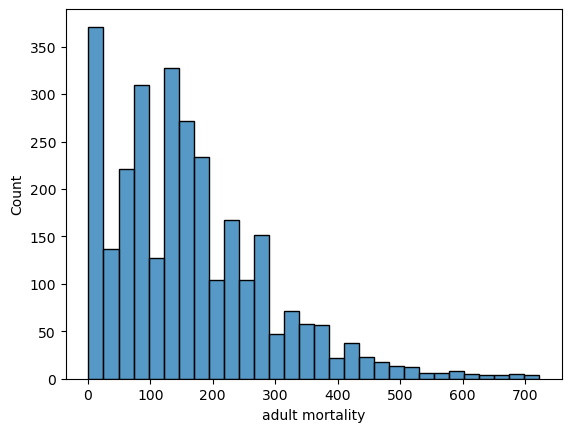

In [30]:
# adult mortality
_= sns.histplot(ev_df, x= 'adult mortality', bins = 30)
#parece que há muitos números bem baixos, por isso, daremos uma verificada

In [31]:
ev_df[ ev_df['adult mortality'] <= 1 ]

country  year development status  life expectancy  \
23                   Albania  2008         Developing             75.3   
209                 Barbados  2014         Developing             75.4   
254                  Belgium  2001          Developed             78.0   
329   Bosnia and Herzegovina  2006         Developing             75.7   
376        Brunei Darussalam  2007         Developing             76.0   
556                    Chile  2003         Developing             77.9   
637               Costa Rica  2003         Developing             78.0   
639               Costa Rica  2001         Developing             77.5   
928                  Finland  2001         Developing             78.0   
1467                 Lebanon  2006         Developing             74.1   
2242            Saudi Arabia  2006         Developing             73.2   
2665                 Tunisia  2015         Developing             75.3   

      adult mortality  infant deaths  alcohol intake  health over gdp  \
23                1.0              1            5.61        36.622068   
209               1.0              0            8.82       294.905658   
254               1.0              1           11.01      2943.375396   
329               1.0              0            4.82        38.254141   
376               1.0              0            0.85      2048.557422   
556               1.0              2            6.37       584.099343   
637               1.0              1            4.04      1070.268999   
639               1.0              1            4.29       868.371359   
928               1.0              0            8.94      2775.335440   
1467              1.0              1            1.82       534.579570   
2242              1.0              9            0.08      1395.454965   
2665              1.0              3             NaN         0.000000   

      hepb immunization  measles cases  ...  polio immunization  \
23                 99.0              0  ...                99.0   
209                94.0              0  ...                95.0   
254                 6.0             83  ...                96.0   
329                 9.0             17  ...                91.0   
376                97.0              0  ...                95.0   
556                 NaN              1  ...                96.0   
637                86.0              1  ...                88.0   
639                 8.0              0  ...                92.0   
928                 NaN              1  ...                95.0   
1467               78.0            956  ...                75.0   
2242               96.0            807  ...                96.0   
2665               98.0             16  ...                98.0   

      gov health expenditure  dtp3 immunization  hiv/aids deaths  \
23                  5.870000               99.0              0.1   
209                 7.470000               94.0              0.1   
254                 8.290000               95.0              0.1   
329                 8.280000               87.0              0.1   
376                 2.320000               99.0              0.1   
556                 7.340000               96.0              0.1   
637                 8.450000               88.0              0.1   
639                 7.250000               91.0              0.1   
928                 7.430000               98.0              0.1   
1467                8.830000               78.0              0.1   
2242                3.550000               96.0              0.1   
2665                6.052667               98.0              0.1   

               gdp  population  thinness 10-19 years  thinness 5-9 years  \
23      437.539647   2947314.0                   1.6                 1.6   
209   15359.669710         NaN                   3.8                 3.7   
254   23121.566350    128657.0                   0.8                 0.8   
329     344.321698   3779468.0                 

In [32]:
ev_df[ ev_df['adult mortality'] >= 700 ]

country  year development status  life expectancy  adult mortality  \
2932  Zimbabwe  2005         Developing             44.6            717.0   
2933  Zimbabwe  2004         Developing             44.3            723.0   
2934  Zimbabwe  2003         Developing             44.5            715.0   

      infant deaths  alcohol intake  health over gdp  hepb immunization  \
2932             28            4.14         8.717409               65.0   
2933             27            4.36         0.000000               68.0   
2934             26            4.06         0.000000                7.0   

      measles cases  ...  polio immunization  gov health expenditure  \
2932            420  ...                69.0                    6.44   
2933             31  ...                67.0                    7.13   
2934            998  ...                 7.0                    6.52   

      dtp3 immunization  hiv/aids deaths         gdp  population  \
2932               68.0             30.3  444.765750    129432.0   
2933               65.0             33.6  454.366654  12777511.0   
2934               68.0             36.7  453.351155  12633897.0   

      thinness 10-19 years  thinness 5-9 years    hdi  schooling  
2932                   9.0                 9.0  0.406        9.3  
2933                   9.4                 9.4  0.407        9.2  
2934                   9.8                 9.9  0.418        9.5  

[3 rows x 22 columns]

In [33]:
#esses dados são suspeitos, dado que a descrição é: "Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)"
#não faz sentido ter o número 1 para a Finlândia, por exemplo (cuja taxa de mortalidade em 2001 era de 138 homens a cada 1000) e 717 para o Zimbabwe em 2005, que tinha uma taxa de 715 mortes a cada 1000 homens.
# fonte: https://data.worldbank.org/indicator/SP.DYN.AMRT.MA?end=2021&locations=FI-ZW&start=2000

In [34]:
ev_df[ev_df['adult mortality'] <= 100 ]

country  year development status  life expectancy  adult mortality  \
13    Afghanistan  2002         Developing             56.2              3.0   
16        Albania  2015         Developing             77.8             74.0   
17        Albania  2014         Developing             77.5              8.0   
18        Albania  2013         Developing             77.2             84.0   
19        Albania  2012         Developing             76.9             86.0   
...           ...   ...                ...              ...              ...   
2918       Zambia  2003         Developing             46.4             64.0   
2919       Zambia  2002         Developing             45.5             69.0   
2930     Zimbabwe  2007         Developing             46.6             67.0   
2931     Zimbabwe  2006         Developing             45.4              7.0   
2935     Zimbabwe  2002         Developing             44.8             73.0   

      infant deaths  alcohol intake  health over gdp  hepb immunization  \
13               88            0.01        16.887351               64.0   
16                0            4.60       364.975229               99.0   
17                0            4.51       428.749067               98.0   
18                0            4.76       430.876979               99.0   
19                0            5.14       412.443356               99.0   
...             ...             ...              ...                ...   
2918             39            2.33        65.789974                NaN   
2919             41            2.44        54.043480                NaN   
2930             29            3.88        29.814566               72.0   
2931             28            4.57        34.262169               68.0   
2935             25            4.43         0.000000               73.0   

      measles cases  ...  polio immunization  gov health expenditure  \
13             2486  ...                36.0                    7.76   
16                0  ...                99.0                    6.00   
17                0  ...                98.0                    5.88   
18                0  ...                99.0                    5.66   
19                9  ...                99.0                    5.59   
...             ...  ...                 ...                     ...   
2918            881  ...                85.0                    8.18   
2919          25036  ...                85.0                    6.93   
2930            242  ...                73.0                    4.47   
2931            212  ...                71.0                    5.12   
2935            304  ...                73.0                    6.53   

      dtp3 immunization  hiv/aids deaths          gdp  population  \
13                 36.0              0.1   187.845950  21979923.0   
16                 99.0              0.1  3954.227830     28873.0   
17                 98.0              0.1  4575.763787    288914.0   
18                 99.0              0.1  4414.723140    289592.0   
19                 99.0              0.1  4247.614380      2941.0   
...                 ...              ...          ...         ...   
2918               83.0             18.2   429.158343  11421984.0   
2919               84.0             18.4   377.135244    111249.0   
2930               73.0             23.7   396.998217   1332999.0   
2931                7.0             26.8   414.796232  13124267.0   
2935               71.0             39.8    57.348340    125525.0   

      thinness 10-19 years  thinness 5-9 years    hdi  schooling  
13                    19.9                 2.2  0.341        6.2  
16                     1.2                 1.3  0.762       14.2  
17                     1.2                 1.3  0.761       14.2  
18                     1.3                 1.4  0.759       14.2  
19                     1.3                 1.4  0.752       14.2  
...                    ...                 ...    ..

In [35]:
ev_df[ev_df['country']== 'Zimbabwe']
# até os dados de um mesmo país estão colocados em proporções diferentes

country  year development status  life expectancy  adult mortality  \
2922  Zimbabwe  2015         Developing             67.0            336.0   
2923  Zimbabwe  2014         Developing             59.2            371.0   
2924  Zimbabwe  2013         Developing             58.0            399.0   
2925  Zimbabwe  2012         Developing             56.6            429.0   
2926  Zimbabwe  2011         Developing             54.9            464.0   
2927  Zimbabwe  2010         Developing             52.4            527.0   
2928  Zimbabwe  2009         Developing             50.0            587.0   
2929  Zimbabwe  2008         Developing             48.2            632.0   
2930  Zimbabwe  2007         Developing             46.6             67.0   
2931  Zimbabwe  2006         Developing             45.4              7.0   
2932  Zimbabwe  2005         Developing             44.6            717.0   
2933  Zimbabwe  2004         Developing             44.3            723.0   
2934  Zimbabwe  2003         Developing             44.5            715.0   
2935  Zimbabwe  2002         Developing             44.8             73.0   
2936  Zimbabwe  2001         Developing             45.3            686.0   
2937  Zimbabwe  2000         Developing             46.0            665.0   

      infant deaths  alcohol intake  health over gdp  hepb immunization  \
2922             22             NaN         0.000000               87.0   
2923             23            6.50        10.822595               91.0   
2924             25            6.39        10.666707               95.0   
2925             26            6.09        92.602336               97.0   
2926             28            6.00        63.750530               94.0   
2927             29            5.21        53.308581                9.0   
2928             30            4.64         1.040021               73.0   
2929             30            3.56        20.843429               75.0   
2930             29            3.88        29.814566               72.0   
2931             28            4.57        34.262169               68.0   
2932             28            4.14         8.717409               65.0   
2933             27            4.36         0.000000               68.0   
2934             26            4.06         0.000000                7.0   
2935             25            4.43         0.000000               73.0   
2936             25            1.72         0.000000               76.0   
2937             24            1.68         0.000000               79.0   

      measles cases  ...  polio immunization  gov health expenditure  \
2922              0  ...                88.0                6.158667   
2923              0  ...                92.0                6.440000   
2924              0  ...                95.0                6.880000   
2925              0  ...                95.0                6.690000   
2926              0  ...                93.0                6.310000   
2927           9696  ...                89.0                5.370000   
2928            853  ...                69.0                6.260000   
2929              0  ...                75.0                4.960000   
2930            242  ...                73.0                4.470000   
2931            212  ...                71.0                5.120000   
2932            420  ...                69.0                6.440000   
2933             31  ...                67.0                7.130000   
2934            998  ...                 7.0                6.520000   
2935            304  ...                73.0                6.530000   
2936            529  ...                76.0                6.160000   
2937           1483  ...                78.0                7.100000   

      dtp3 immunization  hiv/aids deaths         gdp  population  \
2922               87.0              6.2  118.693830  15777451.0   
2923               91.0              6.3  127.474620  154116

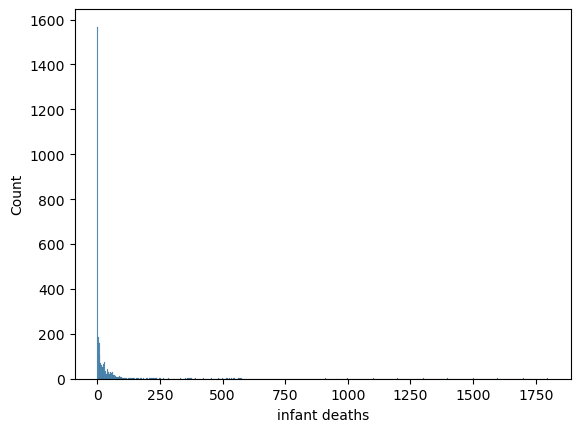

In [36]:
# infant deaths
_= sns.histplot(ev_df, x= 'infant deaths')

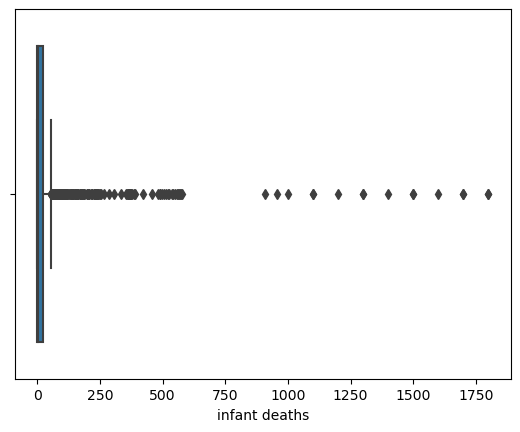

In [37]:
# esses dados tem uma relevante cauda à direita
_= sns.boxplot(ev_df, x= 'infant deaths')

In [38]:
# Analisar no detalhe, pois, pela escala definida nos METADADOS,
# esse número está dentro do intervalos 0-1000
ev_df[ ev_df['infant deaths'] > 750 ]

country  year development status  life expectancy  adult mortality  \
1186   India  2015         Developing             68.3            181.0   
1187   India  2014         Developing             68.0            184.0   
1188   India  2013         Developing             67.6            187.0   
1189   India  2012         Developing             67.3             19.0   
1190   India  2011         Developing             66.8            193.0   
1191   India  2010         Developing             66.4            196.0   
1192   India  2009         Developing             66.0              2.0   
1193   India  2008         Developing             65.5             23.0   
1194   India  2007         Developing             65.2             26.0   
1195   India  2006         Developing             64.8             28.0   
1196   India  2005         Developing             64.4            211.0   
1197   India  2004         Developing             64.0            214.0   
1198   India  2003         Developing             63.7            216.0   
1199   India  2002         Developing             63.3            219.0   
1200   India  2001         Developing             62.9            222.0   
1201   India  2000         Developing             62.5            224.0   

      infant deaths  alcohol intake  health over gdp  hepb immunization  \
1186            910             NaN         0.000000               87.0   
1187            957            3.07        86.521539               79.0   
1188           1000            3.11        67.672304                7.0   
1189           1100            3.10        64.969645               73.0   
1190           1100            3.00        64.605901               44.0   
1191           1200            2.77        57.733599               38.0   
1192           1300            2.50         0.844186               37.0   
1193           1300            1.93        43.030433               29.0   
1194           1400            1.59         5.234770                6.0   
1195           1500            1.37        34.859427                6.0   
1196           1500            1.27         3.509637                8.0   
1197           1600            1.20        27.338009                6.0   
1198           1700            1.19        19.480868                NaN   
1199           1700            1.10        17.812056                NaN   
1200           1800            1.00        19.003406                NaN   
1201           1800            0.93        19.266157                NaN   

      measles cases  ...  polio immunization  gov health expenditure  \
1186          90387  ...                86.0                4.358667   
1187          79563  ...                84.0                4.690000   
1188          13822  ...                82.0                4.530000   
1189          18668  ...                79.0                4.390000   
1190          33634  ...                79.0                4.330000   
1191          31458  ...                76.0                4.280000   
1192          56188  ...                73.0                4.380000   
1193          44258  ...                69.0                4.340000   
1194          41144  ...                67.0                4.230000   
1195          64185  ...                66.0                4.250000   
1196          36711  ...                65.0                4.280000   
1197          55443  ...                58.0                4.220000   
1198          47147  ...                57.0                4.300000   
1199          40044  ...                58.0                4.400000   
1200          51780  ...                58.0                4.500000   
1201          38835  ...                57.0                4.260000   

      dtp3 immunization  hiv/aids deaths          gdp    population  \
1186               87.0              0.2  1613.188780  1.395398e+06   
1187               85.0              0.2  1573.118890  1.293859e+09   
1188           

In [39]:
# nota-se que esses dados não são confiáveis. Logo devemos tomar uma decisão entre:
# 1. remover essa coluna
# 2. coletar novamente os esses dados, e os demais acima de 750 (vistos como discrepantes no boxplot)
# 3. remover os registros da India

In [40]:
#após uma pesquisa online, encontramos que essas mortes vão de 66 para 36 entre 2000 e 2015, o que quer dizer que nossos dados estão MUITO estranhos
#(fonte: https://www.macrotrends.net/countries/IND/india/infant-mortality-rate#:~:text=The%20current%20infant%20mortality%20rate,a%203.74%25%20decline%20from%202021.)

<Axes: xlabel='under-five deaths', ylabel='Count'>

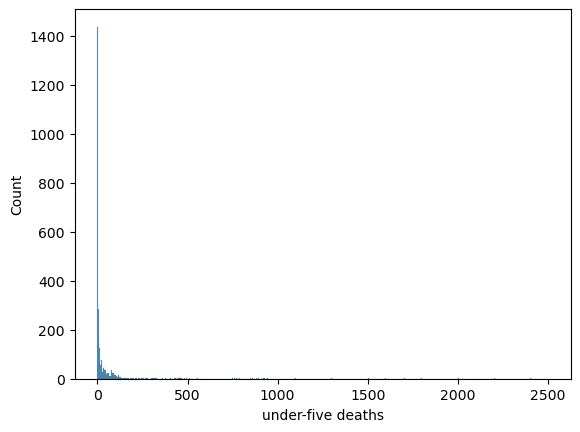

In [41]:
# under-five deaths
sns.histplot(ev_df, x= 'under-five deaths')

In [42]:
ev_df[ ev_df['under-five deaths'] > 750 ]

country  year development status  life expectancy  adult mortality  \
1186    India  2015         Developing             68.3            181.0   
1187    India  2014         Developing             68.0            184.0   
1188    India  2013         Developing             67.6            187.0   
1189    India  2012         Developing             67.3             19.0   
1190    India  2011         Developing             66.8            193.0   
1191    India  2010         Developing             66.4            196.0   
1192    India  2009         Developing             66.0              2.0   
1193    India  2008         Developing             65.5             23.0   
1194    India  2007         Developing             65.2             26.0   
1195    India  2006         Developing             64.8             28.0   
1196    India  2005         Developing             64.4            211.0   
1197    India  2004         Developing             64.0            214.0   
1198    India  2003         Developing             63.7            216.0   
1199    India  2002         Developing             63.3            219.0   
1200    India  2001         Developing             62.9            222.0   
1201    India  2000         Developing             62.5            224.0   
1894  Nigeria  2014         Developing             53.6            362.0   
1895  Nigeria  2013         Developing             53.2            367.0   
1896  Nigeria  2012         Developing             52.7            374.0   
1897  Nigeria  2011         Developing             52.3            375.0   
1898  Nigeria  2010         Developing             52.0            374.0   
1899  Nigeria  2009         Developing             51.6            376.0   
1900  Nigeria  2008         Developing             59.0            386.0   
1901  Nigeria  2007         Developing             55.0            388.0   
1902  Nigeria  2006         Developing             49.8            396.0   
1903  Nigeria  2005         Developing             49.2              4.0   
1904  Nigeria  2004         Developing             48.5             47.0   
1905  Nigeria  2003         Developing             48.1             41.0   
1906  Nigeria  2002         Developing             47.7             49.0   
1907  Nigeria  2001         Developing             47.4             48.0   
1908  Nigeria  2000         Developing             47.1             45.0   

      infant deaths  alcohol intake  health over gdp  hepb immunization  \
1186            910             NaN         0.000000               87.0   
1187            957            3.07        86.521539               79.0   
1188           1000            3.11        67.672304                7.0   
1189           1100            3.10        64.969645               73.0   
1190           1100            3.00        64.605901               44.0   
1191           1200            2.77        57.733599               38.0   
1192           1300            2.50         0.844186               37.0   
1193           1300            1.93        43.030433               29.0   
1194           1400            1.59         5.234770                6.0   
1195           1500            1.37        34.859427                6.0   
1196           1500            1.27         3.509637                8.0   
1197           1600            1.20        27.338009                6.0   
1198           1700            1.19        19.480868                NaN   
1199           1700            1.10        17.812056                NaN   
1200           1800            1.00        19.003406                NaN   
1201           1800            0.93        19.266157                NaN   
1894            490            0.01       263.211103               49.0   
1895            498            8.30       194.203288               46.0   
1896            505            8.54       204.718626               42.0   
1897            513            8.75       187.573319               46.0  

In [43]:
#segundo o World Bank, na Índia, esse número vai de 93 em 2000 para 44 em 2015
#Na Nigeria, de 182 em 2000 para 126 em 2015
#fonte: https://data.worldbank.org/indicator/SH.DYN.MORT?end=2015&locations=IN-NG&start=2000
#é possível que estejam usando números absolutos?

<Axes: xlabel='hiv/aids deaths', ylabel='Count'>

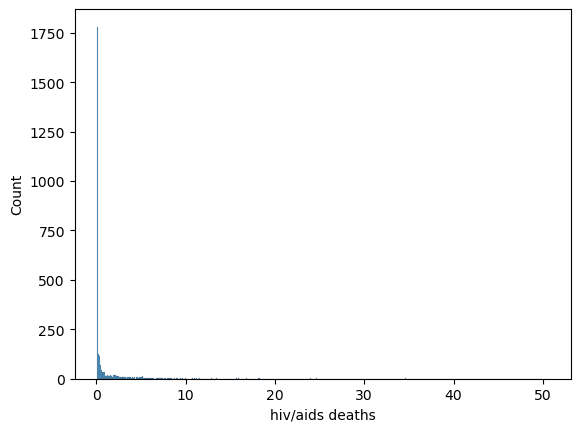

In [44]:
# hiv/aids deaths
sns.histplot(ev_df, x= 'hiv/aids deaths')
# há muitos números baixíssimos, mas não para quê suspeitar desses dados, já que ele representa a morte de crianças até 4 anos por HIV

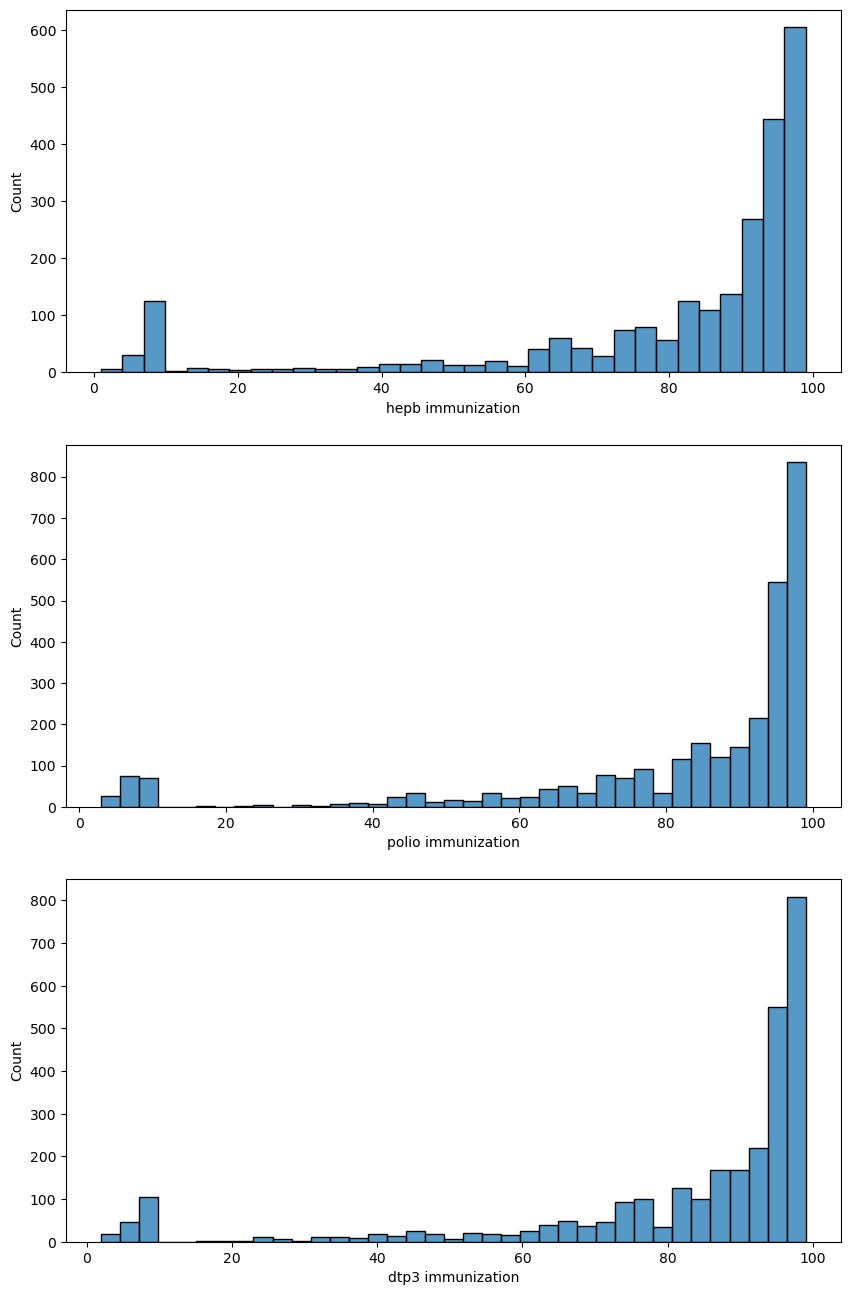

In [45]:
# immunization
plt.figure(figsize= (10, 16))

plt.subplot(3, 1, 1)
sns.histplot(ev_df, x= 'hepb immunization')
plt.subplot(3, 1, 2)
sns.histplot(ev_df, x= 'polio immunization')
plt.subplot(3, 1, 3)
_= sns.histplot(ev_df, x= 'dtp3 immunization')

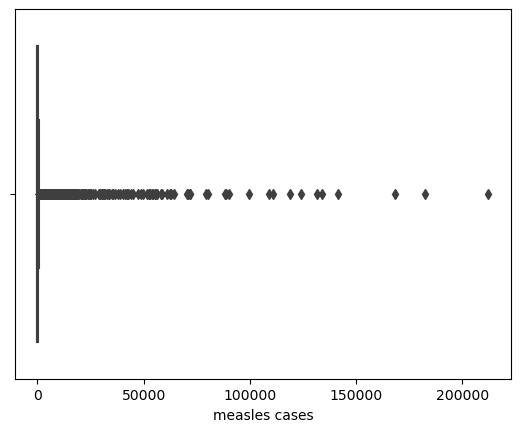

In [46]:
# Sarampo
_= sns.boxplot(ev_df, x= 'measles cases')

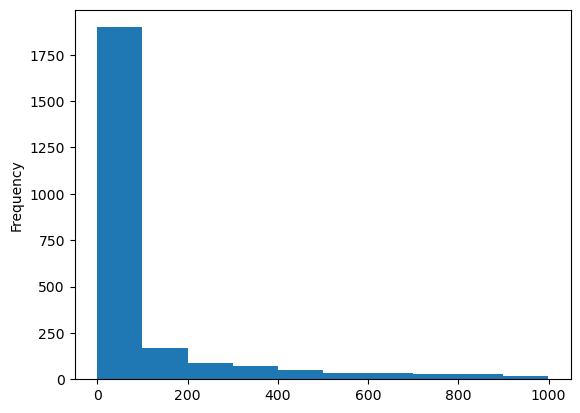

In [47]:
# tambem era de se esperar uma escala de 0 a 1000, pois é uma medição a cada 1000 pessoas da população
_= ev_df[ev_df['measles cases'] < 1000]['measles cases'].plot.hist()

In [48]:
ev_df[ev_df['measles cases'] > 1000]

country  year development status  life expectancy  adult mortality  \
0     Afghanistan  2015         Developing             65.0            263.0   
3     Afghanistan  2012         Developing             59.5            272.0   
4     Afghanistan  2011         Developing             59.2            275.0   
5     Afghanistan  2010         Developing             58.8            279.0   
6     Afghanistan  2009         Developing             58.6            281.0   
...           ...   ...                ...              ...              ...   
2919       Zambia  2002         Developing             45.5             69.0   
2920       Zambia  2001         Developing             44.6            611.0   
2921       Zambia  2000         Developing             43.8            614.0   
2927     Zimbabwe  2010         Developing             52.4            527.0   
2937     Zimbabwe  2000         Developing             46.0            665.0   

      infant deaths  alcohol intake  health over gdp  hepb immunization  \
0                62            0.01        71.279624               65.0   
3                69            0.01        78.184215               67.0   
4                71            0.01         7.097109               68.0   
5                74            0.01        79.679367               66.0   
6                77            0.01        56.762217               63.0   
...             ...             ...              ...                ...   
2919             41            2.44        54.043480                NaN   
2920             43            2.61        46.830275                NaN   
2921             44            2.62        45.616880                NaN   
2927             29            5.21        53.308581                9.0   
2937             24            1.68         0.000000               79.0   

      measles cases  ...  polio immunization  gov health expenditure  \
0              1154  ...                 6.0                    8.16   
3              2787  ...                67.0                    8.52   
4              3013  ...                68.0                    7.87   
5              1989  ...                66.0                    9.20   
6              2861  ...                63.0                    9.42   
...             ...  ...                 ...                     ...   
2919          25036  ...                85.0                    6.93   
2920          16997  ...                86.0                    6.56   
2921          30930  ...                85.0                    7.16   
2927           9696  ...                89.0                    5.37   
2937           1483  ...                78.0                    7.10   

      dtp3 immunization  hiv/aids deaths         gdp  population  \
0                  65.0              0.1  584.259210  33736494.0   
3                  67.0              0.1  669.959000   3696958.0   
4                  68.0              0.1   63.537231   2978599.0   
5                  66.0              0.1  553.328940   2883167.0   
6                  63.0              0.1  445.893298    284331.0   
...                 ...              ...         ...         ...   
2919               84.0             18.4  377.135244    111249.0   
2920               85.0             18.6  378.273624   1824125.0   
2921               85.0             18.7  341.955625   1531221.0   
2927               89.0             15.7  713.635620   1486317.0   
2937               78.0             43.5  547.358878  12222251.0   

      thinness 10-19 years  thinness 5-9 years    hdi  schooling  
0                     17.2                17.3  0.479       10.1  
3                     17.9                18.0  0.463        9.8  
4                     18.2                18.2  0.454        9.5  
5                     18.4                18.4  0.448        9.2  
6                     18.6                18.7  0.434        8.9  
...                    ...                 ...    ...        ...

In [49]:
# Esse não parece ser um dado muito confiável, dada sua definição e tanta diversidade
# dos outliers, o recomendado é remover essa coluna
# escolha aprovada por consenso entre a dupla

<Axes: xlabel='life expectancy', ylabel='Count'>

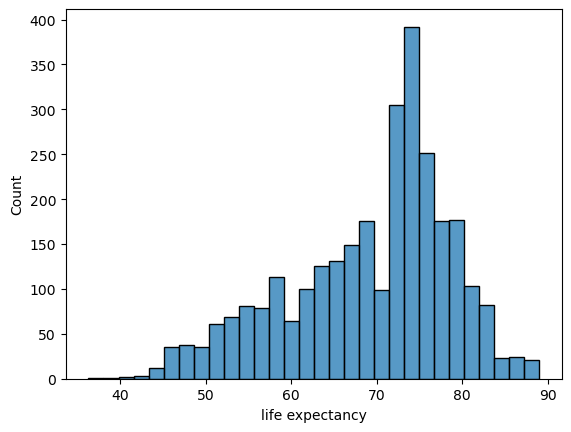

In [50]:
# life expectancy
sns.histplot(ev_df, x= 'life expectancy')
# esses dados parecem adequados

<Axes: xlabel='alcohol intake', ylabel='Count'>

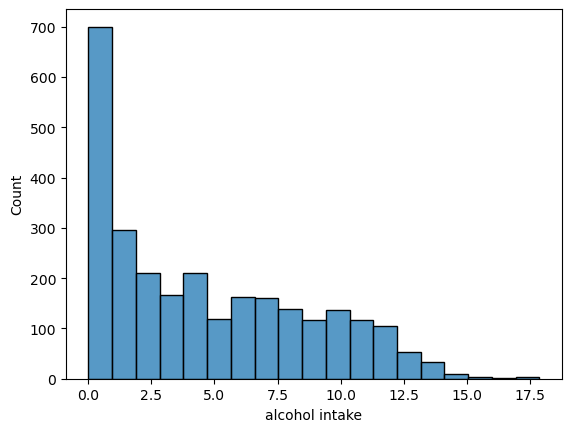

In [51]:
# alcohol intake
sns.histplot(ev_df, x= 'alcohol intake')
# já sabíamos que há bastantes dados nulos

<Axes: xlabel='alcohol intake', ylabel='Count'>

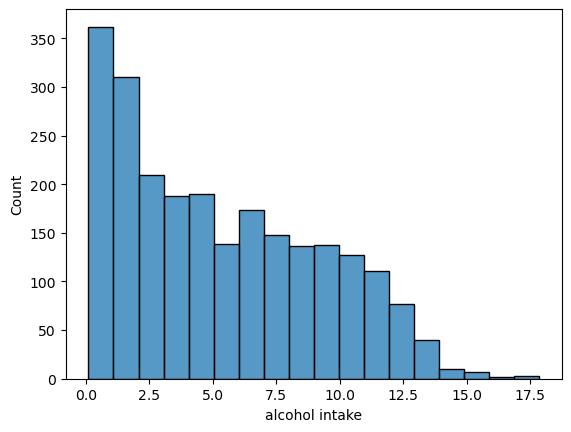

In [52]:
#vendo os dados sem os números menores que 0.1
sns.histplot(ev_df[ev_df['alcohol intake'] >= 0.1], x='alcohol intake')

<Axes: xlabel='health over gdp', ylabel='Count'>

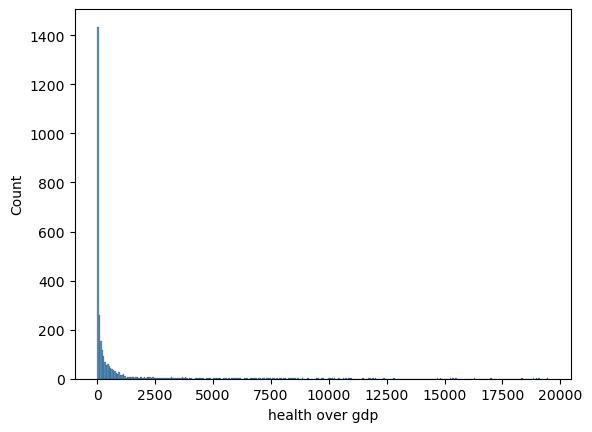

In [53]:
#health over gdp
sns.histplot(ev_df, x= 'health over gdp')


<Axes: xlabel='health over gdp', ylabel='Count'>

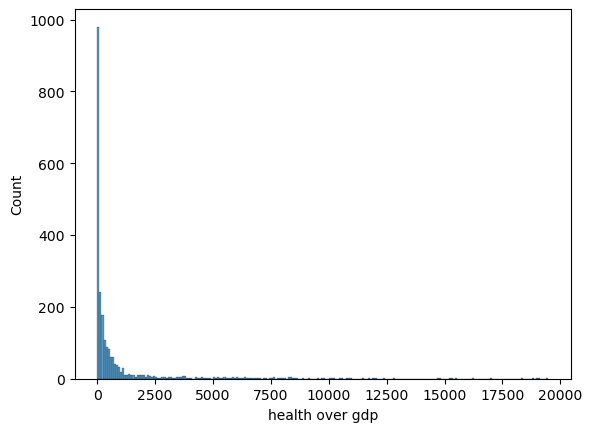

In [54]:
# health over GDP acima de 0
sns.histplot(ev_df[ev_df['health over gdp'] != 0], x='health over gdp')
# há algo estranho nesses dados, pois essa variável deveria ser percentual. 
# De qualquer forma, como ele depende do GDP e sabemos que há valores nulos disso, 
# mas eles não parecem afetar tanto o formato do gráfico quanto o fato de que, como o 'adult mortality',
# há um provlema de escala com essa variável

<Axes: xlabel='bmi', ylabel='Count'>

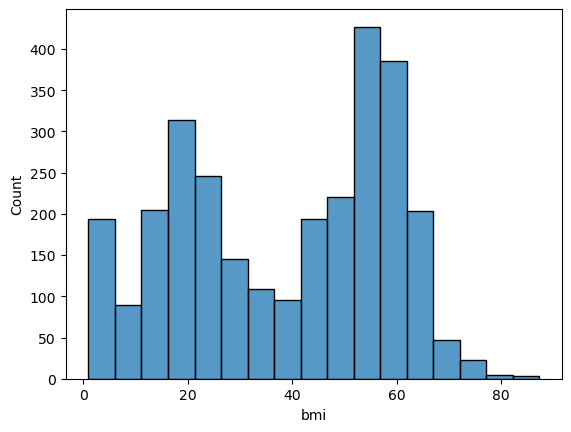

In [55]:
#bmi
sns.histplot(ev_df, x= 'bmi')

#na maioria das tabelas, um IMC de quarenta já caracteriza a Obesidade Mórbida (o maior grau de obesidade),
#então esses dados também estão um pouco estranhos. IMCs maiores que 69 já nem aparecem nas tabelas
#ainda estão melhores que alguns outros

<Axes: xlabel='gov health expenditure', ylabel='Count'>

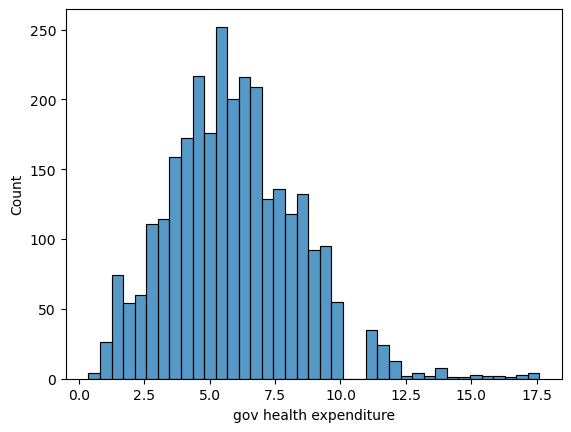

In [56]:
#gov health expenditure, em porcentagem
sns.histplot(ev_df, x= 'gov health expenditure')
# os números fazem sentido como porcentagens

<Axes: xlabel='gdp', ylabel='Count'>

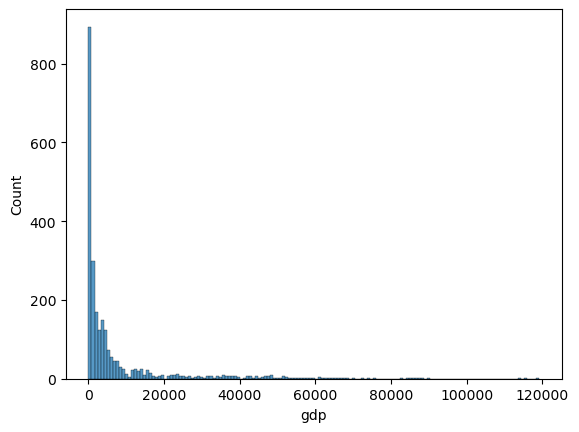

In [57]:
#gdp
sns.histplot(ev_df, x= 'gdp')

<Axes: xlabel='population', ylabel='Count'>

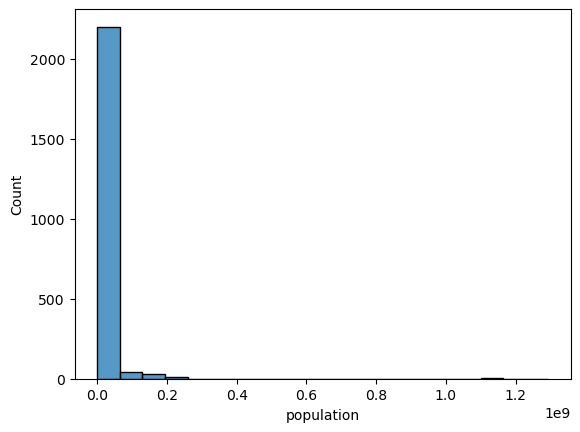

In [58]:
#population
sns.histplot(ev_df, x= 'population', bins= 20)
# observa-se uma grande variação nos dados

<Axes: xlabel='population'>

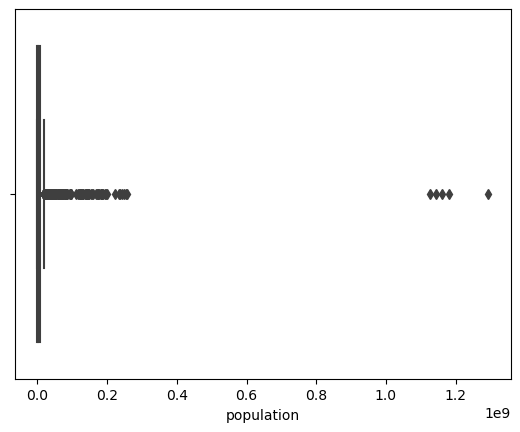

In [59]:
sns.boxplot(ev_df, x= 'population')

In [60]:
ev_df[ev_df['population'] < 100000]
# o gráfico mostra que temos problemas também na escala da população,
# já que os números da Albânia e Vanuatu, por exemplo, têm uma diferença de 10x entre os anos.

country  year development status  life expectancy  adult mortality  \
16    Albania  2015         Developing             77.8             74.0   
19    Albania  2012         Developing             76.9             86.0   
24    Albania  2007         Developing             75.9              9.0   
29    Albania  2002         Developing             73.3             15.0   
30    Albania  2001         Developing             73.6             14.0   
...       ...   ...                ...              ...              ...   
2849  Vanuatu  2008         Developing             75.0            153.0   
2852  Vanuatu  2005         Developing             69.9            165.0   
2853  Vanuatu  2004         Developing             69.6            169.0   
2856  Vanuatu  2001         Developing             69.1            179.0   
2857  Vanuatu  2000         Developing             69.0             18.0   

      infant deaths  alcohol intake  health over gdp  hepb immunization  \
16                0            4.60       364.975229               99.0   
19                0            5.14       412.443356               99.0   
24                1            5.58        32.246552               98.0   
29                1            3.73       104.516916               96.0   
30                1            4.25        96.205571               96.0   
...             ...             ...              ...                ...   
2849              0            1.18       345.339056               61.0   
2852              0            0.88       337.294285               61.0   
2853              0            0.85       334.167337               63.0   
2856              0            0.91       163.105292               68.0   
2857              0            1.21        21.900752                7.0   

      measles cases  ...  polio immunization  gov health expenditure  \
16                0  ...                99.0                    6.00   
19                9  ...                99.0                    5.59   
24               22  ...                99.0                    6.10   
29               16  ...                98.0                    6.30   
30               18  ...                97.0                    6.00   
...             ...  ...                 ...                     ...   
2849              0  ...                66.0                    3.66   
2852              3  ...                67.0                    3.87   
2853              0  ...                67.0                    4.12   
2856              7  ...                67.0                    3.37   
2857              9  ...                67.0                    3.28   

      dtp3 immunization  hiv/aids deaths          gdp  population  \
16                 99.0              0.1  3954.227830     28873.0   
19                 99.0              0.1  4247.614380      2941.0   
24                 98.0              0.1   363.136850     29717.0   
29                 98.0              0.1  1453.642777      3511.0   
30                 97.0              0.1  1326.973390     36173.0   
...                 ...              ...          ...         ...   
2849               67.0              0.1  2697.961375     22534.0   
2852               68.0              0.1  1886.433359      2937.0   
2853               69.0              0.1  1787.947230     24143.0   
2856                7.0              0.1  1362.617310     18929.0   
2857               71.0              0.1  1469.849149     18563.0   

      thinness 10-19 years  thinness 5-9 years    hdi  schooling  
16                     1.2                 1.3  0.762       14.2  
19                     1.3                 1.4  0.752       14.2  
24                     1.6                 1.7  0.703       11.6  
29                     2.0                 2.1  0.670       10.7  
30                     2.1                 2.1  0.662       10.6  
...                    ...                 ...    ...        ...  
2849                   1.5   

<Axes: xlabel='thinness 10-19 years', ylabel='Count'>

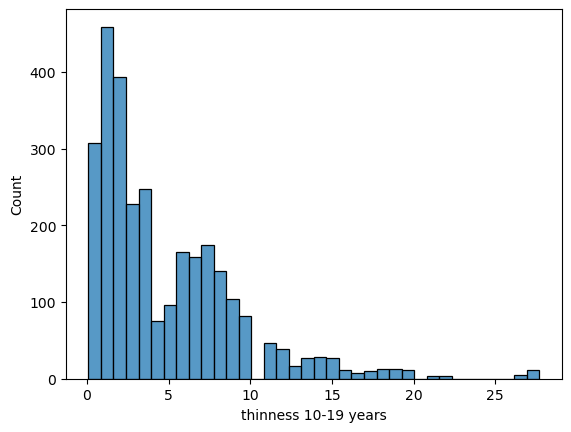

In [61]:
#thinness 10-19 years (porcentagem)
sns.histplot(ev_df, x= 'thinness 10-19 years')
# a distribuição é razoável

<Axes: xlabel='thinness 5-9 years', ylabel='Count'>

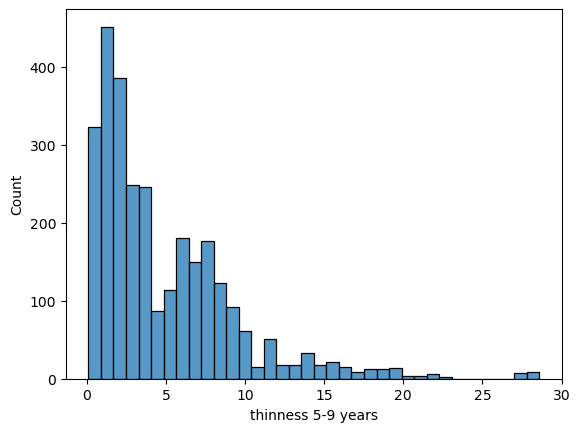

In [62]:
#thinness 5-9 years
sns.histplot(ev_df, x= 'thinness 5-9 years')

<Axes: xlabel='hdi', ylabel='Count'>

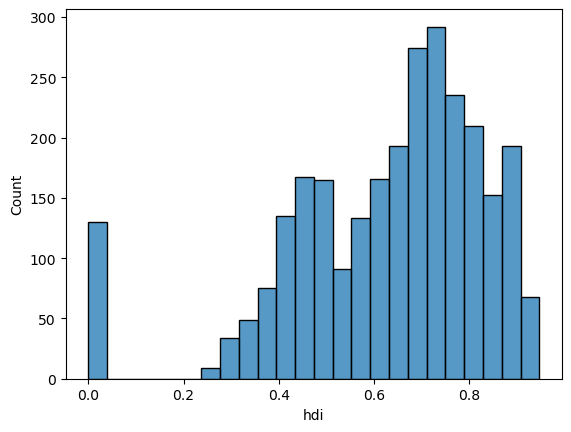

In [63]:
#hdi: Human Development Index (vai de 0 a 1)
sns.histplot(ev_df, x= 'hdi')
#muitos zeros, conforme constatamos anteriormente

<Axes: xlabel='schooling', ylabel='Count'>

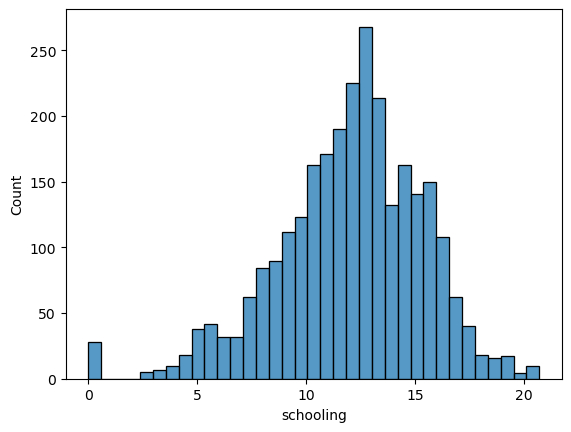

In [64]:
#schooling (em anos)
sns.histplot(ev_df, x= 'schooling')

# 3.2 Análise Bi ou Multivariada

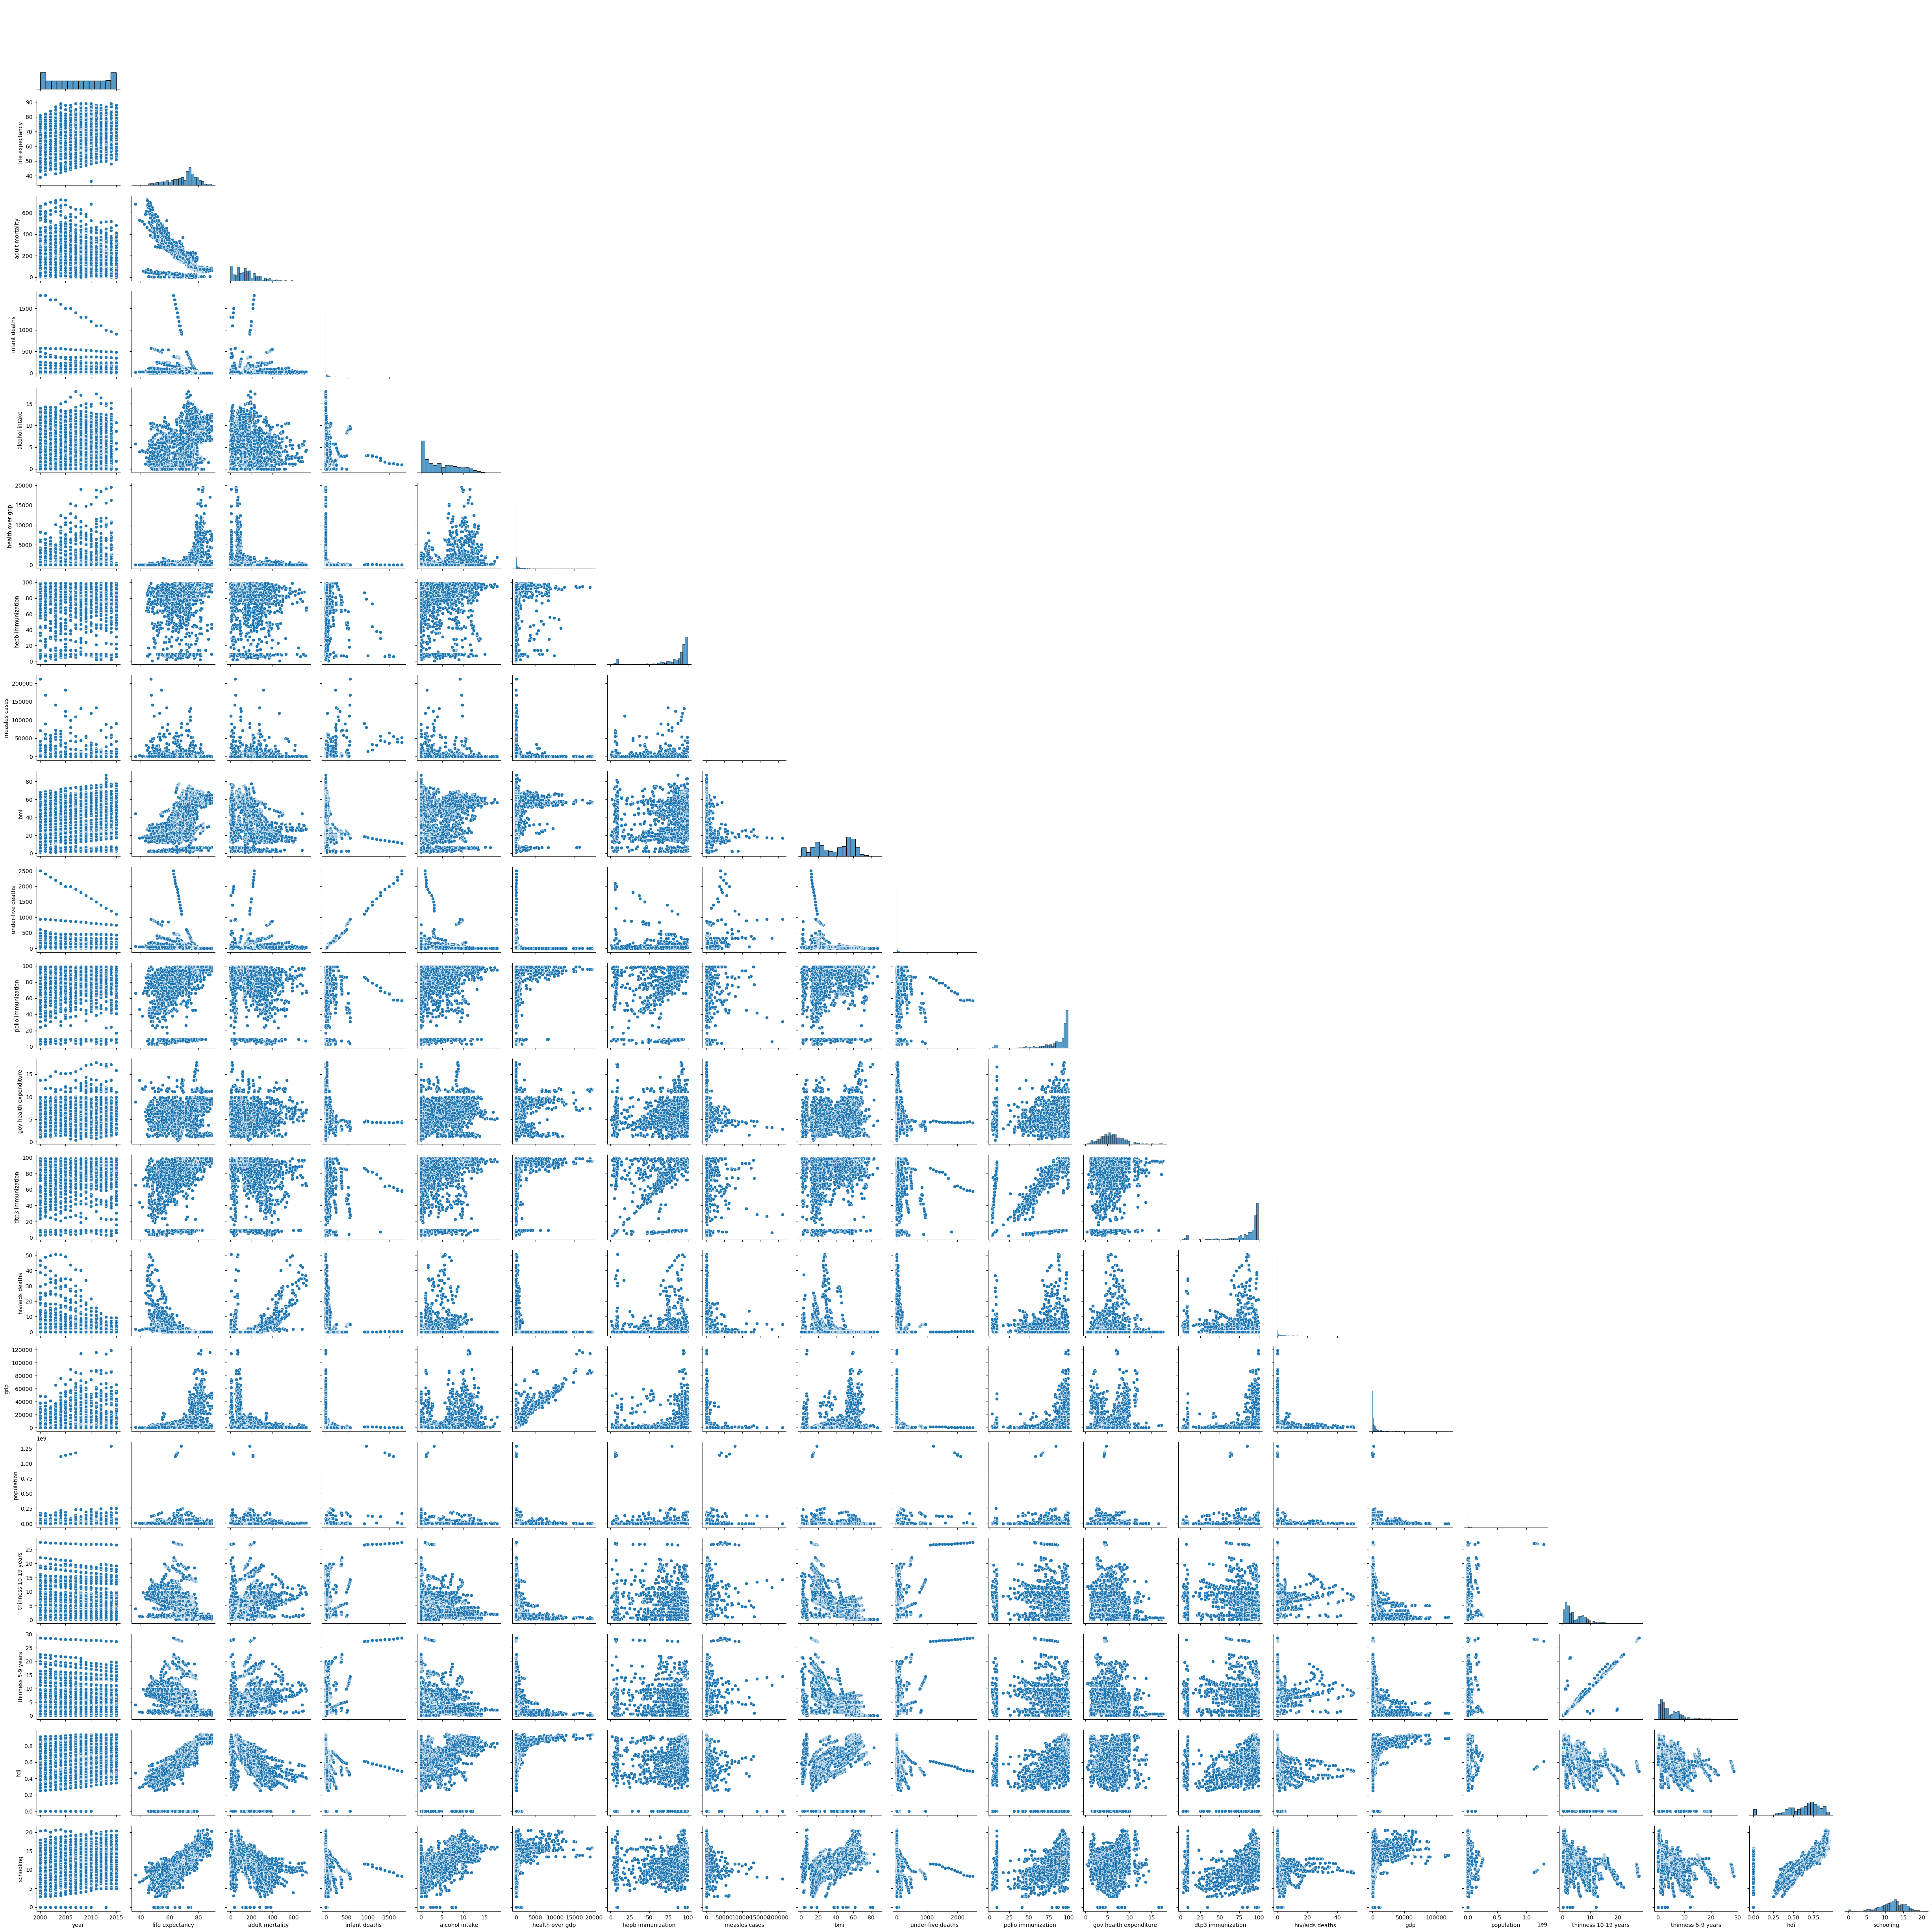

In [65]:
# um pairplot pra começar
sns.pairplot(ev_df, corner=True)

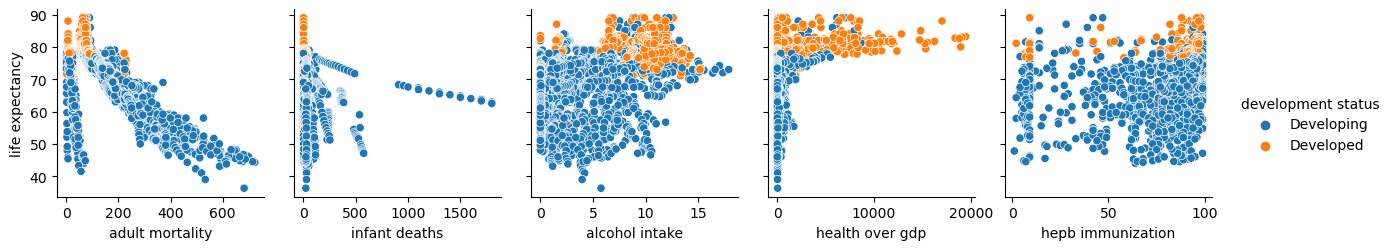

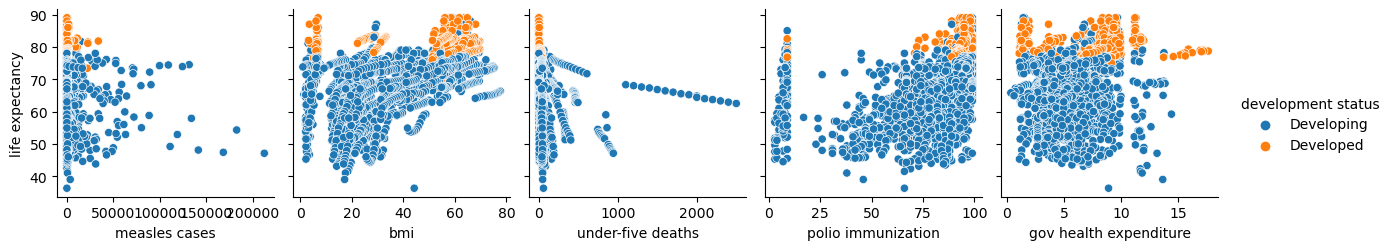

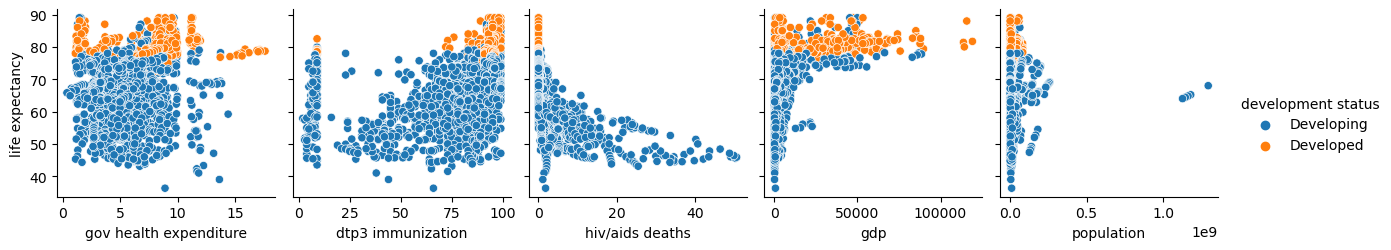

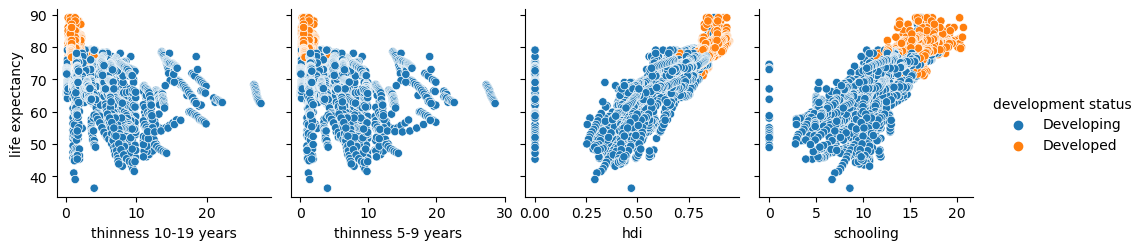

In [66]:
#pairplots focando em life expectancy e usando o desenvolvimento como hue
sns.pairplot(ev_df, y_vars='life expectancy', x_vars=[
    'adult mortality',
    'infant deaths',
    'alcohol intake',
    'health over gdp',
    'hepb immunization'], hue='development status')
sns.pairplot(ev_df, y_vars='life expectancy', x_vars=[
    'measles cases',
    'bmi',
    'under-five deaths',
    'polio immunization',
    'gov health expenditure'], hue='development status')
sns.pairplot(ev_df, y_vars='life expectancy', x_vars=[
    'gov health expenditure',
    'dtp3 immunization',
    'hiv/aids deaths',
    'gdp',
    'population'], hue='development status')
sns.pairplot(ev_df, y_vars='life expectancy', x_vars=[
    'thinness 10-19 years',
    'thinness 5-9 years',
    'hdi',
    'schooling'], hue='development status')

#esses gráficos apontam uma relação forte entre as variáveis e o development status

In [67]:
#correlações
correlacao = ev_df.corr()
correlacao

C:\Users\julia\AppData\Local\Temp\ipykernel_30520\4129009941.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacao = ev_df.corr()


year  life expectancy  adult mortality  \
year                    1.000000         0.170033        -0.079052   
life expectancy         0.170033         1.000000        -0.696359   
adult mortality        -0.079052        -0.696359         1.000000   
infant deaths          -0.037415        -0.196557         0.078756   
alcohol intake         -0.052990         0.404877        -0.195848   
health over gdp         0.031400         0.381864        -0.242860   
hepb immunization       0.104333         0.256762        -0.162476   
measles cases          -0.082493        -0.157586         0.031176   
bmi                     0.108974         0.567694        -0.387017   
under-five deaths      -0.042937        -0.222529         0.094146   
polio immunization      0.094158         0.465556        -0.274823   
gov health expenditure  0.082162         0.229312        -0.125048   
dtp3 immunization       0.134337         0.479495        -0.275131   
hiv/aids deaths        -0.139741        -0.556556         0.523821   
gdp                     0.101620         0.461455        -0.296049   
population              0.016969        -0.021538        -0.013647   
thinness 10-19 years   -0.047876        -0.477183         0.302904   
thinness 5-9 years     -0.050929        -0.471584         0.308457   
hdi                     0.243468         0.724776        -0.457626   
schooling               0.209400         0.751975        -0.454612   

                        infant deaths  alcohol intake  health over gdp  \
year                        -0.037415       -0.052990         0.031400   
life expectancy             -0.196557        0.404877         0.381864   
adult mortality              0.078756       -0.195848        -0.242860   
infant deaths                1.000000       -0.115638        -0.085612   
alcohol intake              -0.115638        1.000000         0.341285   
health over gdp             -0.085612        0.341285         1.000000   
hepb immunization           -0.223566        0.087549         0.016274   
measles cases                0.501128       -0.051827        -0.056596   
bmi                         -0.227279        0.330408         0.228700   
under-five deaths            0.996629       -0.112370        -0.087852   
polio immunization          -0.170689        0.221734         0.147259   
gov health expenditure      -0.130018        0.298330         0.172233   
dtp3 immunization           -0.175171        0.222020         0.143624   
hiv/aids deaths              0.025231       -0.048845        -0.097857   
gdp                         -0.108427        0.354712         0.899373   
population                   0.556801       -0.035252        -0.025662   
thinness 10-19 years         0.465711       -0.428795        -0.251369   
thinness 5-9 years           0.471350       -0.417414        -0.252905   
hdi                         -0.145139        0.450040         0.381952   
schooling                   -0.193720        0.547378         0.389687   

                        hepb immunization  measles cases       bmi  \
year                             0.104333      -0.082493  0.108974   
life expectancy                  0.256762      -0.157586  0.567694   
adult mortality                 -0.162476       0.031176 -0.387017   
infant deaths                   -0.223566       0.501128 -0.227279   
alcohol intake                   0.087549      -0.051827  0.330408   
health over gdp                  0.016274      -0.056596  0.228700   
hepb immunization                1.000000      -0.120529  0.150380   
measles cases                   -0.120529       1.000000 -0.175977   
bmi                              0.150380      -0.175977  1.000000   
under-five deaths               -0.233126       0.507809 -0.237669   
polio immunization               0.486171      -0.136166  0.284569   
gov health expenditure           0.063893      -0.104912  0.243629   
dtp3 immunization                0.611495      -0.141882  0.283147   
hiv/aids deaths       

<Axes: >

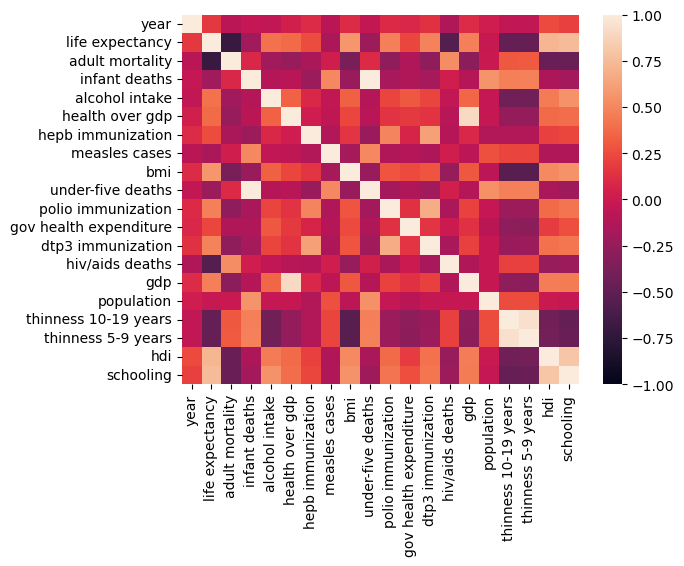

In [68]:
#heatmap das correlações
sns.heatmap(correlacao, vmin=-1, vmax =1)

In [69]:
# Há alta correlacao entre os pares:
# - under-five deaths & infant deaths
# - health over gdp & gdp
# - thinness 5-9 years & thinness 10-19 years
# É recomendado eliminar um de cada par

In [70]:
#talvez as varáveis mais relevantes para expectativa de vida, somente olhando para esse mapa de calor, sejam adult mortality, HIV (?), hdi e schooling. A magreza entre 5 e 19 anos também parece afetar esses dados.
#Há outras correlações no mapa que fazem sentido, como a relação entre infant deaths (morte antes de completar um ano) e under-5 deaths (morte antes de completar 5 anos)

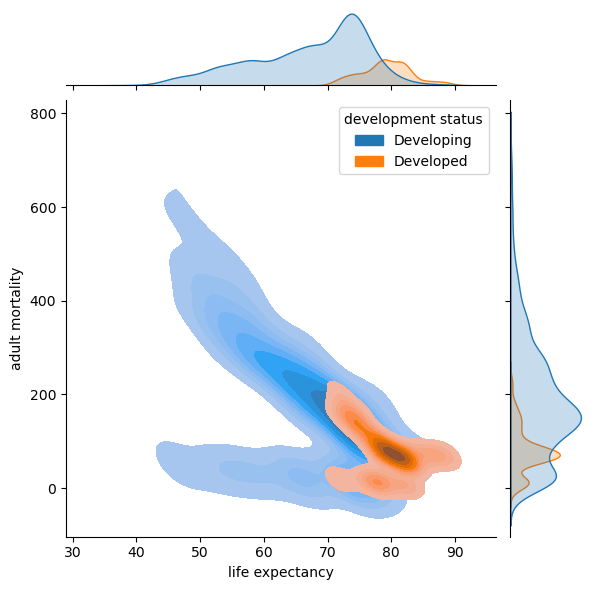

In [71]:
#vamos apresentar, então, mais alguns gráficos com as variáveis (aparentemente) mais relevantes, na ordem das colunas
#1: jointplot life expectancy x adult mortality
sns.jointplot(
    x='life expectancy', 
    y='adult mortality', 
    data= ev_df,
    hue= 'development status',
    kind = 'kde', fill=True);

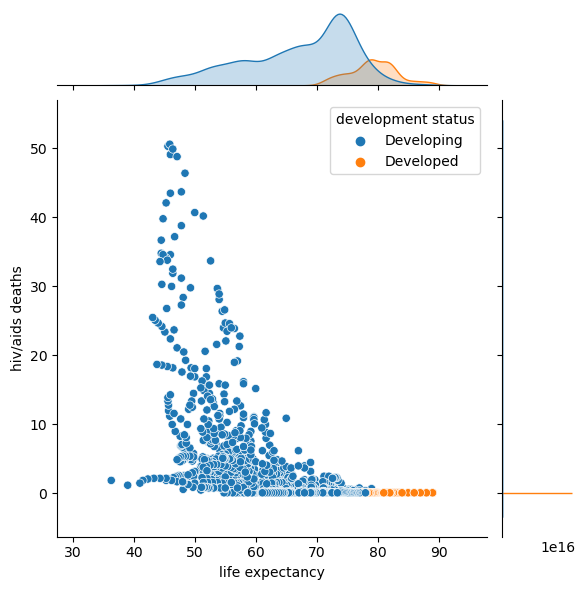

In [72]:
#2: jointplot life expectancy x HIV
sns.jointplot(
    x='life expectancy', 
    y='hiv/aids deaths', 
    data= ev_df,
    hue='development status')

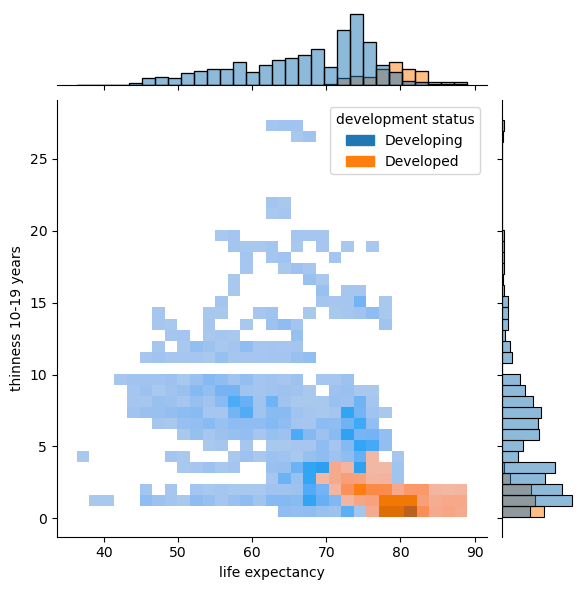

In [73]:
#3: jointplot life expectancy x thinness 10-19
sns.jointplot(
    x='life expectancy', 
    y='thinness 10-19 years', 
    data= ev_df,
    kind='hist',
    hue='development status')
#os gráficos anteriores mostram uma relação mais "bonita" entre as variáveis

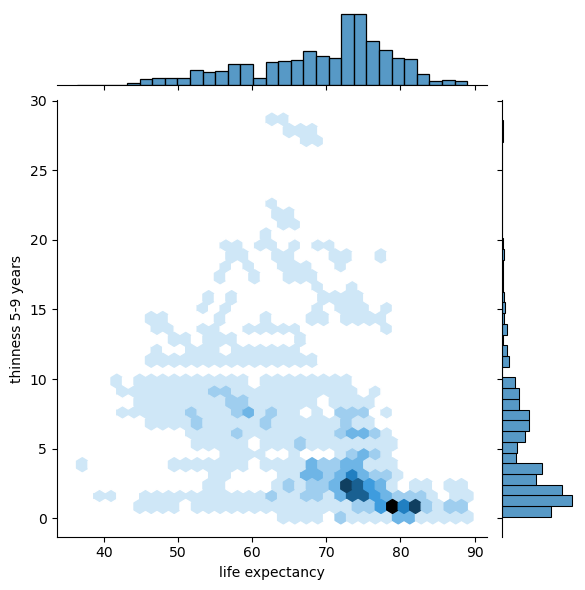

In [74]:
#4: jointplot life expectancy x thinness 5-9
sns.jointplot(
    x='life expectancy', 
    y='thinness 5-9 years', 
    data= ev_df,
    kind='hex',
    bins=10)

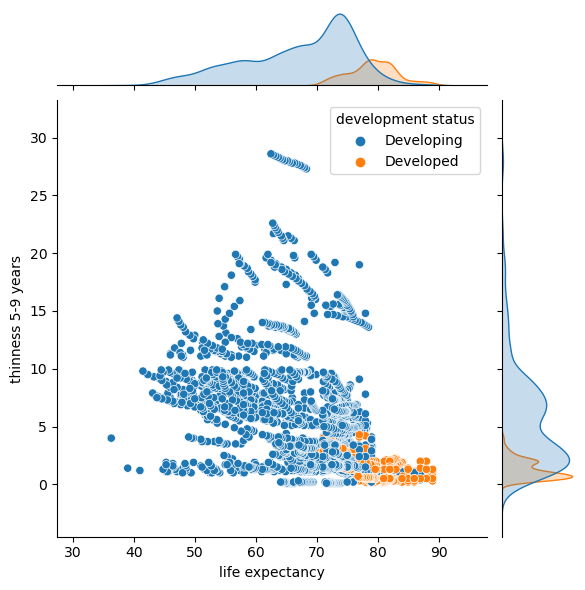

In [75]:
#4.5: jointplot life expectancy x thinness 5-9
sns.jointplot(
    x='life expectancy', 
    y='thinness 5-9 years', 
    data= ev_df,
    hue='development status')


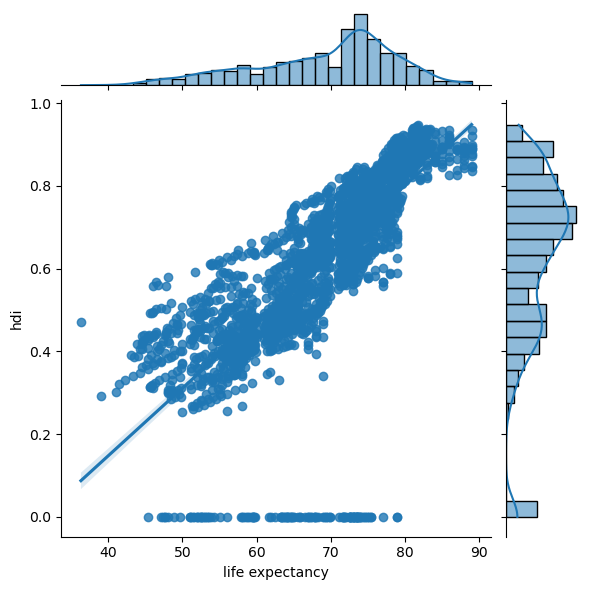

In [76]:
#5: jointplot life expectancy x hdi
sns.jointplot(
    x='life expectancy', 
    y='hdi', 
    data= ev_df,
    kind='reg')

#infelizmente, não dá pra usar esse tipo de jointplot com hue

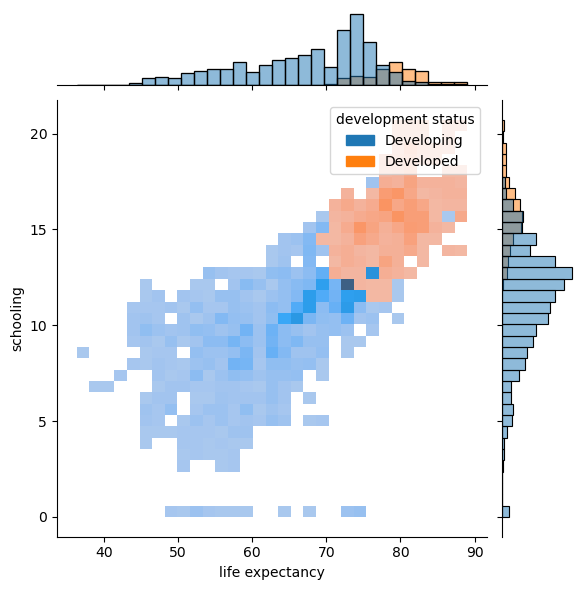

In [77]:
#6: jointplot life expectancy x schooling
sns.jointplot(
    x='life expectancy', 
    y='schooling', 
    data= ev_df,
    kind='hist',
    hue='development status')

### Tratamento dos dados com base no EDA

In [78]:
def tratar_dados(
    raw_df,
    remove_rare_countries = False,
    dumizar_development_status = True,
    remover_mortalities = True,
    remover_sarampo = True,
    eliminar_altas_correlacoes = True
):
    df_tratado = raw_df.copy()

    if remove_rare_countries:
        pass
    
    if dumizar_development_status:
        df_tratado = pd.get_dummies(df_tratado, columns= ['development status'], drop_first= True)

    if remover_mortalities:
        # adult mortality, infant deaths e under 5 deaths estão estranhos
        df_tratado = df_tratado.drop(['adult mortality', 'infant deaths', 'under-five deaths'], axis= 1)

    if remover_sarampo:
        df_tratado = df_tratado.drop(['measles cases'], axis= 1)

    if eliminar_altas_correlacoes:
      if 'under-five deaths' in df_tratado and 'infant deaths' in df_tratado:
        df_tratado = df_tratado.drop(['infant deaths'], axis= 1)

      if 'gdp' in df_tratado and 'health over gdp' in df_tratado:
        df_tratado = df_tratado.drop(['health over gdp'], axis= 1)

      if 'thinness 5-9 years' in df_tratado and 'thinness 10-19 years' in df_tratado:
        df_tratado = df_tratado.drop(['thinness 10-19 years'], axis= 1)

    return df_tratado 

In [79]:
# Aplicação do tratamento
ev_df = limpar_dados(ev_df)
ev_df = tratar_dados(ev_df)

# 4. Modelos de regressão

In [80]:
# lib para gerar novas features
from sklearn.preprocessing import PolynomialFeatures

# lib para treinar e testar modelos
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [81]:
# variaveis para o modelo
ev_df.columns.tolist()

['index',
 'country',
 'year',
 'life expectancy',
 'alcohol intake',
 'bmi',
 'polio immunization',
 'gov health expenditure',
 'dtp3 immunization',
 'hiv/aids deaths',
 'gdp',
 'population',
 'thinness 5-9 years',
 'development status_Developing']

In [82]:
y_var = 'life expectancy'

x_var = [
    # 'index',
    # 'country',
    'year',
    'life expectancy',
    'alcohol intake',
    'bmi',
    'polio immunization',
    'gov health expenditure',
    'dtp3 immunization',
    'hiv/aids deaths',
    'gdp',
    'population',
    'thinness 5-9 years',
    'development status_Developing'
 ]

features_data, output_data = ev_df[x_var], ev_df[y_var]
x_treino, x_teste, y_treino, y_teste = train_test_split(features_data, output_data, test_size= 0.2, stratify=ev_df["country"])

print('features do treino')
display(x_treino.head())

print('\noutput do treino')
display(y_treino.head())

print()
print('total:', ev_df.shape[0])
print('treino:', x_treino.shape[0])
print('teste:', x_teste.shape[0])

features do treino


year  life expectancy  alcohol intake   bmi  polio immunization  \
859   2009             74.2           11.46  61.1                99.0   
563   2008             74.6            3.76  49.3                94.0   
553   2003             73.0            6.32  46.1                65.0   
28    2003             72.8            4.29  47.9                97.0   
1431  2012             52.7            8.54  23.5                42.0   

      gov health expenditure  dtp3 immunization  hiv/aids deaths  \
859                     7.55               99.0              0.1   
563                     5.66               96.0              0.1   
553                     5.53               79.0              2.3   
28                      6.27               97.0              0.1   
1431                    3.30               42.0              4.4   

               gdp   population  thinness 5-9 years  \
859   12967.165430      12265.0                 1.8   
563    4274.952650   14447562.0                 1.2   
553    2372.628827     896776.0                 3.5   
28      189.681557     339616.0                 2.0   
1431   2755.297787  167297284.0                 1.6   

      development status_Developing  
859                               0  
563                               1  
553                               1  
28                                1  
1431                              1


output do treino


859     74.2
563     74.6
553     73.0
28      72.8
1431    52.7
Name: life expectancy, dtype: float64


total: 2095
treino: 1676
teste: 419


In [83]:
construtor_polinomio = PolynomialFeatures(2, include_bias= False)

construtor_polinomio.fit(x_treino)

x_treino_polinomial = construtor_polinomio.transform(x_treino)
x_teste_polinomial = construtor_polinomio.transform(x_teste)

In [84]:
modelos = [
    { 'desc' : 'Linear', 'modelo' : LinearRegression(), 'treino' : x_treino, 'teste' : x_teste },
    { 'desc' : 'Linear c/ Regularização L2', 'modelo' : LinearRegression(), 'treino' : x_treino, 'teste' : x_teste },
    { 'desc' : 'Linear c/ Regularização L1', 'modelo' : LinearRegression(), 'treino' : x_treino, 'teste' : x_teste },
    { 'desc' : 'Linear Polinomial', 'modelo' : LinearRegression(), 'treino' : x_treino_polinomial, 'teste' : x_teste_polinomial },
    { 'desc' : 'Linear Polinomial c/ Regularização L2', 'modelo' : Ridge(alpha= 1), 'treino' : x_treino_polinomial, 'teste' : x_teste_polinomial },
    { 'desc' : 'Linear Polinomial c/ Regularização L1', 'modelo' : Lasso(alpha= 1), 'treino' : x_treino_polinomial, 'teste' : x_teste_polinomial }
]

for modelo_desc in modelos:
  modelo = modelo_desc['modelo']
  x_treino_m = modelo_desc['treino']
  x_teste_m = modelo_desc['teste']

  modelo.fit(x_treino_m, y_treino)

  y_pred = modelo.predict(x_teste_m)
  modelo_desc['y_pred'] = y_pred

  modelo_desc['coef'] = modelo.coef_
  modelo_desc['intercept'] = modelo.intercept_

  modelo_desc['r2_score'] = r2_score(y_teste, y_pred)
  modelo_desc['MSE'] = mean_squared_error(y_teste, y_pred)

  # sobre os dados de treino
  y_pred_treino = modelo.predict(x_treino_m)
  modelo_desc['r2_score_treino'] = r2_score(y_treino, y_pred_treino)
  modelo_desc['MSE_treino'] = mean_squared_error(y_treino, y_pred_treino)

c:\Users\julia\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.52783e-37): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [85]:
# Observar as métricas dos modelos
modelos_matrix = pd.DataFrame(modelos)[['desc', 'r2_score', 'MSE', 'r2_score_treino', 'MSE_treino']]
modelos_matrix

desc  r2_score           MSE  \
0                                 Linear  1.000000  1.050431e-16   
1             Linear c/ Regularização L2  1.000000  1.050431e-16   
2             Linear c/ Regularização L1  1.000000  1.050431e-16   
3                      Linear Polinomial  0.999992  8.425007e-04   
4  Linear Polinomial c/ Regularização L2  0.999999  1.138518e-04   
5  Linear Polinomial c/ Regularização L1  0.999997  3.094633e-04   

   r2_score_treino    MSE_treino  
0         1.000000  4.957267e-17  
1         1.000000  4.957267e-17  
2         1.000000  4.957267e-17  
3         0.999992  8.293674e-04  
4         0.999999  8.483884e-05  
5         0.999997  3.035156e-04

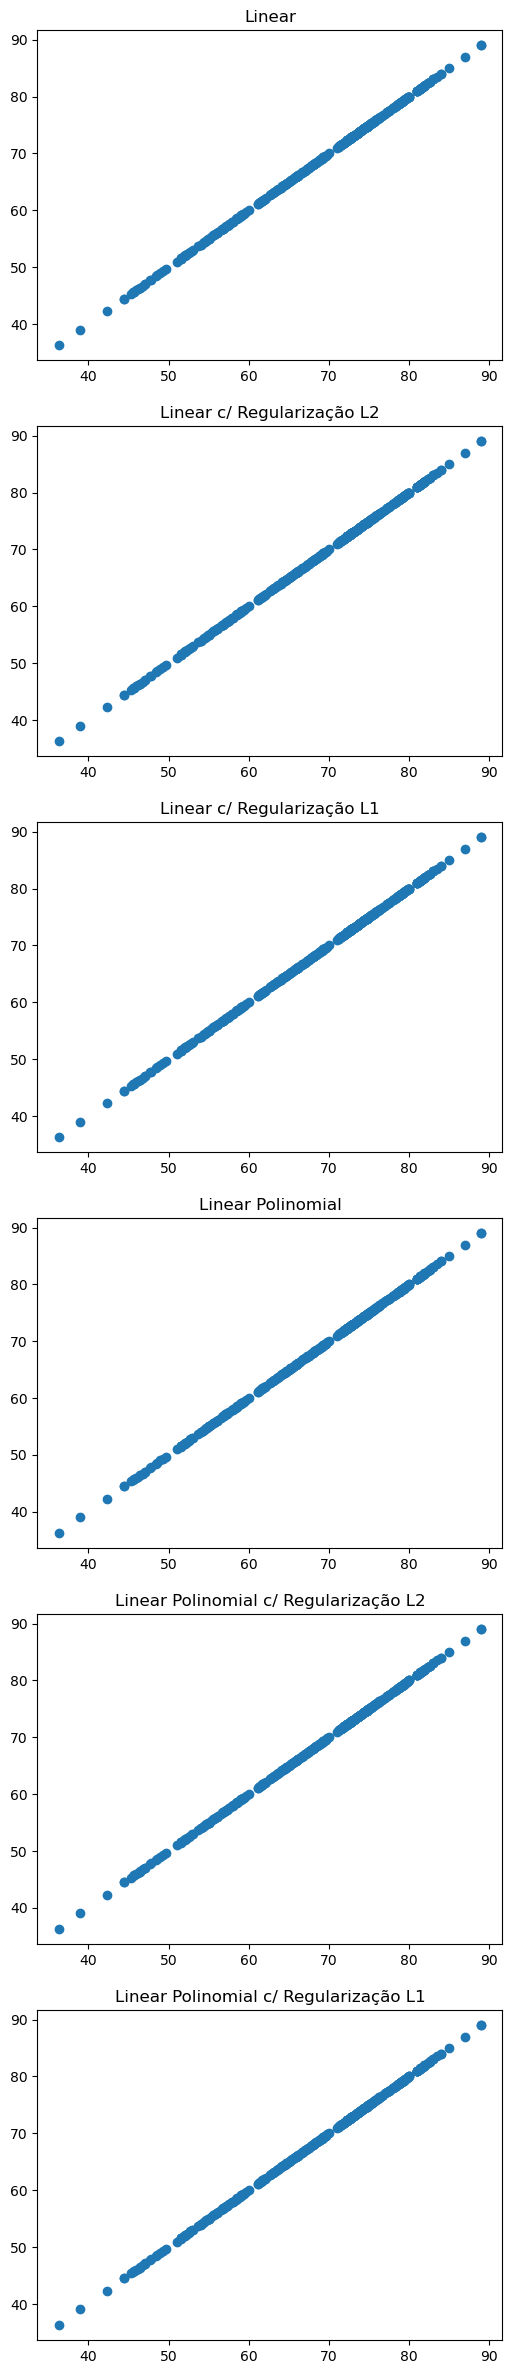

In [86]:
# Observar os gráficos dos modelos

plt.figure(figsize= (6, 30))

for idx, modelo_treinado in enumerate(modelos, start= 1):
  plt.subplot(len(modelos), 1, idx)
  plt.scatter(y= modelo_treinado['y_pred'], x= y_teste)
  plt.title(modelo_treinado['desc'])

Todos os modelos estão muito bons, o que é bastante suspeito, mas não encontramos nada muito gritante para consertar, a não ser os problemas nos dados em si. É provável que estejamos deixando algo passar.  
Algo que poderia ser feito para termos um modelo mais realista seria corrigir os dados das variáveis mais anormais, com grandes problemas de variação na escala.
No final dessa análise, o melhor modelo foi o Linear, seja com ou sem a regularização.